In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-life/dataset/EMA/EMA_definition.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u31.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u36.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u20.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u22.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u07.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u05.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u51.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u27.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u56.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u23.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u09.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u54.json
/kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u15.json
/kaggle/input/stud

In [3]:
from pathlib import Path
from datetime import datetime, timedelta
import json

DATA_ROOT = Path("/kaggle/input/student-life/dataset")

DATA_ROOT, list(DATA_ROOT.iterdir())[:10]

(PosixPath('/kaggle/input/student-life/dataset'),
 [PosixPath('/kaggle/input/student-life/dataset/EMA'),
  PosixPath('/kaggle/input/student-life/dataset/app_usage'),
  PosixPath('/kaggle/input/student-life/dataset/sensing'),
  PosixPath('/kaggle/input/student-life/dataset/calendar'),
  PosixPath('/kaggle/input/student-life/dataset/call_log'),
  PosixPath('/kaggle/input/student-life/dataset/education'),
  PosixPath('/kaggle/input/student-life/dataset/survey'),
  PosixPath('/kaggle/input/student-life/dataset/dinning'),
  PosixPath('/kaggle/input/student-life/dataset/sms')])

In [2]:
# list sensing folder contents
import os

SENSING = "/kaggle/input/student-life/dataset/sensing"
print("=== SENSING FILES ===")
for root, dirs, files in os.walk(SENSING):
    print("\n", root)
    print("Files:", files[:10])

=== SENSING FILES ===

 /kaggle/input/student-life/dataset/sensing
Files: []

 /kaggle/input/student-life/dataset/sensing/conversation
Files: ['conversation_u17.csv', 'conversation_u41.csv', 'conversation_u08.csv', 'conversation_u34.csv', 'conversation_u36.csv', 'conversation_u51.csv', 'conversation_u42.csv', 'conversation_u35.csv', 'conversation_u23.csv', 'conversation_u01.csv']

 /kaggle/input/student-life/dataset/sensing/phonelock
Files: ['phonelock_u15.csv', 'phonelock_u47.csv', 'phonelock_u20.csv', 'phonelock_u17.csv', 'phonelock_u12.csv', 'phonelock_u36.csv', 'phonelock_u00.csv', 'phonelock_u39.csv', 'phonelock_u41.csv', 'phonelock_u42.csv']

 /kaggle/input/student-life/dataset/sensing/phonecharge
Files: ['phonecharge_u30.csv', 'phonecharge_u49.csv', 'phonecharge_u22.csv', 'phonecharge_u23.csv', 'phonecharge_u45.csv', 'phonecharge_u13.csv', 'phonecharge_u25.csv', 'phonecharge_u33.csv', 'phonecharge_u18.csv', 'phonecharge_u20.csv']

 /kaggle/input/student-life/dataset/sensing/dark

In [5]:
# to preview each file in each folder
import pandas as pd
import numpy as np

sensing_root = DATA_ROOT / "sensing"

def preview_file(path, n=5):
    print(f"\n=== Preview: {path.name} ===")
    df = pd.read_csv(path, header=None)
    print(df.head(n))
    print("Shape:", df.shape)
    return df

# Pick one file from each stream we care about
activity_sample = preview_file(next((sensing_root / "activity").glob("*.csv")))
wifi_sample = preview_file(next((sensing_root / "wifi").glob("*.csv")))
phonelock_sample = preview_file(next((sensing_root / "phonelock").glob("*.csv")))
wifi_loc_sample = preview_file(next((sensing_root / "wifi_location").glob("*.csv")))



=== Preview: activity_u35.csv ===
            0                    1
0   timestamp   activity inference
1  1364356942                    0
2  1364356945                    0
3  1364356948                    0
4  1364356950                    0
Shape: (536078, 2)

=== Preview: wifi_u05.csv ===
            0                  1     2      3
0        time              BSSID  freq  level
1  1364356834  dc:7b:94:87:1b:42  2412    -80
2  1364356834  dc:7b:94:87:1f:c3  2412    -86
3  1364356834  dc:7b:94:87:27:5f  5805    -64
4  1364356834  dc:7b:94:87:4d:f1  2462    -84
Shape: (214137, 4)

=== Preview: phonelock_u15.csv ===
            0           1
0       start         end
1  1364357526  1364386856
2  1364396763  1364404425
3  1364410433  1364423434
4  1364500412  1364515280
Shape: (59, 2)

=== Preview: wifi_location_u46.csv ===


/tmp/ipykernel_47/1592511576.py:8: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, header=None)
/tmp/ipykernel_47/1592511576.py:8: DtypeWarning: Columns (0,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, header=None)


ParserError: Error tokenizing data. C error: Expected 2 fields in line 2, saw 3


In [7]:
def unix_ms_to_dt(series):
    # StudentLife uses Unix time in milliseconds
    return pd.to_datetime(series, unit="ms", utc=True)

# Activity: [timestamp, activity_code]
activity_df = load_sensing_subdir(
    subdir="activity",
    col_names=["timestamp", "activity_code"]
)

# Wi-Fi: [timestamp, bssid/ssid, rssi, freq] (we only really need timestamp for now)
wifi_df = load_sensing_subdir(
    subdir="wifi",
    col_names=["timestamp", "wifi_id", "rssi", "freq"]
)

# Phonelock: usually [start_time, end_time] (sometimes extra cols; we keep first two)
phonelock_df = load_sensing_subdir(
    subdir="phonelock",
    col_names=["start_time", "end_time"]
)

print("activity_df:", activity_df.shape)
print("wifi_df:", wifi_df.shape)
print("phonelock_df:", phonelock_df.shape)

activity_df.head(), wifi_df.head(), phonelock_df.head()


/tmp/ipykernel_47/321362769.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, header=None)
/tmp/ipykernel_47/321362769.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, header=None)
/tmp/ipykernel_47/321362769.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, header=None)
/tmp/ipykernel_47/321362769.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, header=None)
/tmp/ipykernel_47/321362769.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, header=None)
/tmp/ipykernel_47/321362769.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  d

activity_df: (22842240, 3)
wifi_df: (19244358, 5)
phonelock_df: (9324, 3)


(    timestamp        activity_code       user_id
 0   timestamp   activity inference  activity_u00
 1  1364356801                    0  activity_u00
 2  1364356804                    0  activity_u00
 3  1364356807                    0  activity_u00
 4  1364356809                    0  activity_u00,
     timestamp            wifi_id  rssi   freq   user_id
 0        time              BSSID  freq  level  wifi_u00
 1  1364356963  00:60:b3:07:1d:27  2427    -90  wifi_u00
 2  1364356963  f8:1e:df:fd:4a:4b  2417    -64  wifi_u00
 3  1364358163  f8:1e:df:fd:4a:4b  2417    -69  wifi_u00
 4  1364358320  f8:1e:df:fd:4a:4b  2417    -74  wifi_u00,
    start_time    end_time        user_id
 0       start         end  phonelock_u00
 1  1364358992  1364364807  phonelock_u00
 2  1364365565  1364381933  phonelock_u00
 3  1364386333  1364391008  phonelock_u00
 4  1364406378  1364411049  phonelock_u00)

In [9]:
# generic loader for per user sensing 
def load_sensing_subdir(subdir: str, col_names=None):
    """
    Load all CSVs under sensing/subdir into one DataFrame.
    Adds 'user_id' from filename (e.g., activity_u35).
    If col_names is provided, assumes no header in files.
    """
    folder = sensing_root / subdir
    files = sorted(folder.glob("*.csv"))
    dfs = []

    for f in files:
        if col_names is None:
            df = pd.read_csv(f)
        else:
            df = pd.read_csv(f, header=None)
            if df.shape[1] >= len(col_names):
                df.columns = col_names + [f"extra_{i}" for i in range(df.shape[1] - len(col_names))]
        df["user_id"] = f.stem  # e.g. 'activity_u35'
        dfs.append(df)

    if not dfs:
        print(f"No files found in {folder}")
        return pd.DataFrame()

    return pd.concat(dfs, ignore_index=True)


In [10]:
import pandas as pd
import numpy as np

sensing_root = DATA_ROOT / "sensing"

def load_activity():
    dfs = []
    for f in sorted((sensing_root / "activity").glob("*.csv")):
        df = pd.read_csv(f, header=0)   # correctly read header row
        df.columns = ["timestamp", "activity_code"]
        df["user_id"] = f.stem.split("_")[-1]
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

def load_wifi():
    dfs = []
    for f in sorted((sensing_root / "wifi").glob("*.csv")):
        df = pd.read_csv(f, header=0)
        df.columns = ["timestamp", "wifi_id", "freq", "level"]
        df["user_id"] = f.stem.split("_")[-1]
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

def load_phonelock():
    dfs = []
    for f in sorted((sensing_root / "phonelock").glob("*.csv")):
        df = pd.read_csv(f, header=0)
        df.columns = ["start_time", "end_time"]
        df["user_id"] = f.stem.split("_")[-1]
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

activity_df = load_activity()
wifi_df = load_wifi()
phonelock_df = load_phonelock()

activity_df.head(), wifi_df.head(), phonelock_df.head()


(    timestamp  activity_code user_id
 0  1364356801              0     u00
 1  1364356804              0     u00
 2  1364356807              0     u00
 3  1364356809              0     u00
 4  1364356992              0     u00,
     timestamp            wifi_id  freq  level user_id
 0  1364356963  00:60:b3:07:1d:27  2427    -90     u00
 1  1364356963  f8:1e:df:fd:4a:4b  2417    -64     u00
 2  1364358163  f8:1e:df:fd:4a:4b  2417    -69     u00
 3  1364358320  f8:1e:df:fd:4a:4b  2417    -74     u00
 4  1364359364  f8:1e:df:fd:4a:4b  2417    -62     u00,
    start_time    end_time user_id
 0  1364358992  1364364807     u00
 1  1364365565  1364381933     u00
 2  1364386333  1364391008     u00
 3  1364406378  1364411049     u00
 4  1364425558  1364429471     u00)

In [11]:
def unix_s_to_dt(series):
    return pd.to_datetime(series, unit="s", utc=True)

activity_df["timestamp_dt"] = unix_s_to_dt(activity_df["timestamp"])
wifi_df["timestamp_dt"] = unix_s_to_dt(wifi_df["timestamp"])
phonelock_df["start_dt"] = unix_s_to_dt(phonelock_df["start_time"])
phonelock_df["end_dt"] = unix_s_to_dt(phonelock_df["end_time"])

activity_df["date"] = activity_df["timestamp_dt"].dt.date
wifi_df["date"] = wifi_df["timestamp_dt"].dt.date
phonelock_df["date"] = phonelock_df["start_dt"].dt.date

print("activity_df:", activity_df.shape)
print("wifi_df:", wifi_df.shape)
print("phonelock_df:", phonelock_df.shape)


activity_df: (22842191, 5)
wifi_df: (19244309, 7)
phonelock_df: (9275, 6)


In [13]:
# Daily features from phonelock: how often and how long the phone is locked

phonelock_df["duration_min"] = (
    (phonelock_df["end_dt"] - phonelock_df["start_dt"]).dt.total_seconds() / 60.0
)

daily_lock = (
    phonelock_df
    .groupby(["user_id", "date"], as_index=False)
    .agg(
        n_lock_intervals=("start_dt", "count"),
        mean_lock_duration_min=("duration_min", "mean"),
        total_lock_duration_min=("duration_min", "sum"),
    )
)

print(daily_lock.shape)
daily_lock.head()


(2538, 5)


,user_id,date,n_lock_intervals,mean_lock_duration_min,total_lock_duration_min
0,u00,2013-03-27,5,118.140000,590.700000
1,u00,2013-03-28,1,81.400000,81.400000
2,u00,2013-03-29,6,112.452778,674.716667
3,u00,2013-03-30,4,110.800000,443.200000
4,u00,2013-03-31,6,204.441667,1226.650000


In [14]:
# Daily counts from activity and wifi (these are lightweight features we may use later)

daily_activity = (
    activity_df
    .groupby(["user_id", "date"], as_index=False)
    .agg(
        n_activity_samples=("timestamp_dt", "count")
    )
)

daily_wifi = (
    wifi_df
    .groupby(["user_id", "date"], as_index=False)
    .agg(
        n_wifi_samples=("timestamp_dt", "count"),
        n_unique_wifi_ids=("wifi_id", "nunique")
    )
)

print(daily_activity.shape, daily_wifi.shape)
daily_activity.head(), daily_wifi.head()


(2883, 3) (2863, 4)


(  user_id        date  n_activity_samples
 0     u00  2013-03-27                6640
 1     u00  2013-03-28                7634
 2     u00  2013-03-29                7972
 3     u00  2013-03-30                4679
 4     u00  2013-03-31                8004,
   user_id        date  n_wifi_samples  n_unique_wifi_ids
 0     u00  2013-03-27            4817               1012
 1     u00  2013-03-28            2996                588
 2     u00  2013-03-29            5504                821
 3     u00  2013-03-30             994                154
 4     u00  2013-03-31             816                 62)

In [15]:
ema_root = DATA_ROOT / "EMA"

print("EMA folder contents:")
for p in sorted(ema_root.iterdir()):
    print(" -", p.name)

EMA folder contents:
 - EMA_definition.json
 - response


In [16]:
response_root = ema_root / "response"

print("Files in EMA/response:")
for p in sorted(response_root.iterdir()):
    print(" -", p.name)

Files in EMA/response:
 - Activity
 - Administration response
 - Behavior
 - Boston Bombing
 - Cancelled Classes
 - Class
 - Class 2
 - Comment
 - Dartmouth now
 - Dimensions
 - Dimensions protestors
 - Dining Halls
 - Events
 - Exercise
 - Green Key 1
 - Green Key 2
 - Lab
 - Mood
 - Mood 1
 - Mood 2
 - PAM
 - QR_Code
 - Sleep
 - Social
 - Stress
 - Study Spaces


In [17]:
import pandas as pd

def load_ema_response():
    dfs = []
    for f in sorted(response_root.glob("*.csv")):
        df = pd.read_csv(f)
        df["source_file"] = f.name
        dfs.append(df)
    if not dfs:
        print("No EMA response CSVs found.")
        return pd.DataFrame()
    return pd.concat(dfs, ignore_index=True)

ema_df = load_ema_response()

print("EMA shape:", ema_df.shape)
ema_df.head()


No EMA response CSVs found.
EMA shape: (0, 0)


""


In [20]:
from pathlib import Path

response_root = ema_root / "response"

all_ema_paths = [p for p in response_root.rglob("*") if p.is_file()]
print("Number of EMA files (any extension):", len(all_ema_paths))
for p in all_ema_paths[:30]:
    print(" -", p, "| suffix:", p.suffix)


Number of EMA files (any extension): 1274
 - /kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u31.json | suffix: .json
 - /kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u36.json | suffix: .json
 - /kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u20.json | suffix: .json
 - /kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u22.json | suffix: .json
 - /kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u07.json | suffix: .json
 - /kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u05.json | suffix: .json
 - /kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u51.json | suffix: .json
 - /kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u27.json | suffix: .json
 - /kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u56.json | suffix: .json
 - /kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u23.json | suffix: .json
 - /kaggle/input/student-life/dataset/EMA/response/Stress/

In [21]:
import json

sample_file = all_ema_paths[0]
print("Sample file:", sample_file)

with open(sample_file, "r") as f:
    sample_json = json.load(f)

sample_json


Sample file: /kaggle/input/student-life/dataset/EMA/response/Stress/Stress_u31.json


[{'null': '3', 'resp_time': 1364122031},
 {'null': '43.70591546,-72.28812724', 'resp_time': 1364122034},
 {'null': '43.70450657,-72.28874981', 'resp_time': 1364122032},
 {'null': '2', 'resp_time': 1364122036},
 {'null': '43.70628474,-72.2870415', 'resp_time': 1364118589},
 {'level': '4',
  'location': '43.68060986,-72.29350695',
  'resp_time': 1364508024},
 {'level': '5', 'location': '43.7063711,-72.2869549', 'resp_time': 1364594440},
 {'level': '3',
  'location': '43.68041184,-72.29313066',
  'resp_time': 1364684254},
 {'level': '4',
  'location': '43.70702548,-72.28665335',
  'resp_time': 1364947339},
 {'level': '1',
  'location': '43.68029104,-72.29385347',
  'resp_time': 1365055481},
 {'level': '4',
  'location': '43.68043243,-72.2937815',
  'resp_time': 1365120832},
 {'level': '1',
  'location': '43.68060527,-72.29378391',
  'resp_time': 1365206421},
 {'level': '4',
  'location': '43.68034282,-72.29380586',
  'resp_time': 1365804015},
 {'level': '1',
  'location': '43.68641769,-72

In [22]:
#Build long EMA table from all JSON files
import pandas as pd
import numpy as np
import json

rows = []

for f in all_ema_paths:
    category = f.parent.name          # e.g. "Stress", "Mood"
    stem = f.stem                     # e.g. "Stress_u31"
    parts = stem.split("_")
    user_id = parts[-1] if len(parts) > 1 else stem

    with open(f, "r") as fh:
        data = json.load(fh)

    if not isinstance(data, list) or len(data) == 0:
        continue

    for item in data:
        # 1) timestamp
        t = item.get("resp_time")
        if t is None:
            continue

        # 2) try to find a numeric level/value
        val = None

        # preferred: explicit 'level' field (like in Stress example)
        if "level" in item:
            val = item["level"]
        else:
            # fallback: 'null' sometimes holds numeric levels, sometimes coordinates
            v = item.get("null")
            if isinstance(v, str) and v and "," not in v:
                # likely a simple number like "3"
                val = v

        if val is None:
            continue

        # cast to float; skip if fails
        try:
            val_num = float(val)
        except Exception:
            continue

        rows.append(
            {
                "user_id": user_id,
                "category": category,
                "resp_time": t,
                "value": val_num,
            }
        )

ema_long = pd.DataFrame(rows)
print("ema_long shape:", ema_long.shape)
ema_long.head()


ema_long shape: (3531, 4)


,user_id,category,resp_time,value
0,u31,Stress,1364122031,3.0
1,u31,Stress,1364122036,2.0
2,u31,Stress,1364508024,4.0
3,u31,Stress,1364594440,5.0
4,u31,Stress,1364684254,3.0


In [23]:
#Convert resp_time to datetime + date
ema_long["timestamp_dt"] = pd.to_datetime(ema_long["resp_time"], unit="s", utc=True)
ema_long["date"] = ema_long["timestamp_dt"].dt.date

print("Categories in EMA:", ema_long["category"].unique())
ema_long.head()


Categories in EMA: ['Stress' 'Class' 'Behavior' 'Mood 2' 'Study Spaces' 'Social' 'Sleep'
 'Activity']


,user_id,category,resp_time,value,timestamp_dt,date
0,u31,Stress,1364122031,3.0,2013-03-24 10:47:11+00:00,2013-03-24
1,u31,Stress,1364122036,2.0,2013-03-24 10:47:16+00:00,2013-03-24
2,u31,Stress,1364508024,4.0,2013-03-28 22:00:24+00:00,2013-03-28
3,u31,Stress,1364594440,5.0,2013-03-29 22:00:40+00:00,2013-03-29
4,u31,Stress,1364684254,3.0,2013-03-30 22:57:34+00:00,2013-03-30


In [24]:
#Aggregate EMA to daily per user + category
ema_daily_long = (
    ema_long
    .groupby(["user_id", "date", "category"], as_index=False)
    .agg(
        mean_value=("value", "mean"),
        n_responses=("value", "count"),
    )
)

print("ema_daily_long shape:", ema_daily_long.shape)
ema_daily_long.head()


ema_daily_long shape: (1967, 5)


,user_id,date,category,mean_value,n_responses
0,u00,2013-03-24,Sleep,4.833333,6
1,u00,2013-03-24,Social,4.000000,1
2,u00,2013-03-25,Social,3.000000,1
3,u00,2013-03-25,Stress,1.333333,3
4,u00,2013-03-26,Stress,2.000000,2


In [25]:
#Pivot categories into columns (e.g., Stress, Mood)
ema_daily_wide = (
    ema_daily_long
    .pivot_table(
        index=["user_id", "date"],
        columns="category",
        values="mean_value",
        aggfunc="mean",
    )
    .reset_index()
)

ema_daily_wide.columns.name = None
print("ema_daily_wide shape:", ema_daily_wide.shape)
ema_daily_wide.head()


ema_daily_wide shape: (1396, 10)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,date,Activity,Behavior,Class,Mood 2,Sleep,Social,Stress,Study Spaces
0,u00,2013-03-24,NaN,NaN,NaN,NaN,4.833333,4.0,NaN,NaN
1,u00,2013-03-25,NaN,NaN,NaN,NaN,NaN,3.0,1.333333,NaN
2,u00,2013-03-26,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
3,u00,2013-03-27,NaN,3.0,NaN,NaN,NaN,NaN,1.000000,NaN
4,u00,2013-03-28,2.0,3.0,NaN,NaN,NaN,NaN,2.666667,NaN


In [26]:
#Merge EMA with daily lock features

daily_merged = (
    daily_lock
    .merge(ema_daily_wide, on=["user_id", "date"], how="inner")
)

print("daily_merged shape:", daily_merged.shape)
daily_merged.head()


daily_merged shape: (1267, 13)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,date,n_lock_intervals,mean_lock_duration_min,total_lock_duration_min,Activity,Behavior,Class,Mood 2,Sleep,Social,Stress,Study Spaces
0,u00,2013-03-27,5,118.140000,590.700000,NaN,3.0,NaN,NaN,NaN,NaN,1.000000,NaN
1,u00,2013-03-28,1,81.400000,81.400000,2.0,3.0,NaN,NaN,NaN,NaN,2.666667,NaN
2,u00,2013-03-29,6,112.452778,674.716667,1.0,3.0,NaN,NaN,NaN,NaN,2.500000,NaN
3,u00,2013-03-30,4,110.800000,443.200000,2.0,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
4,u00,2013-03-31,6,204.441667,1226.650000,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,NaN


In [27]:
# Select core features for RQ1
analysis_df = daily_merged[[
    "user_id",
    "date",
    "n_lock_intervals",
    "mean_lock_duration_min",
    "total_lock_duration_min",
    "Stress",
    "Sleep",
    "Activity",
    "Behavior",
    "Social",
    "Class",
    "Mood 2",
    "Study Spaces",
]]

print(analysis_df.shape)
analysis_df.head()


(1267, 13)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,date,n_lock_intervals,mean_lock_duration_min,total_lock_duration_min,Stress,Sleep,Activity,Behavior,Social,Class,Mood 2,Study Spaces
0,u00,2013-03-27,5,118.140000,590.700000,1.000000,NaN,NaN,3.0,NaN,NaN,NaN,NaN
1,u00,2013-03-28,1,81.400000,81.400000,2.666667,NaN,2.0,3.0,NaN,NaN,NaN,NaN
2,u00,2013-03-29,6,112.452778,674.716667,2.500000,NaN,1.0,3.0,NaN,NaN,NaN,NaN
3,u00,2013-03-30,4,110.800000,443.200000,4.000000,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,u00,2013-03-31,6,204.441667,1226.650000,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Keep only days where we have Stress ratings
stress_df = analysis_df.dropna(subset=["Stress"]).copy()

print("Rows with Stress:", stress_df.shape[0])
stress_df[["n_lock_intervals", "mean_lock_duration_min", "total_lock_duration_min", "Stress"]].describe()


Rows with Stress: 1169


,n_lock_intervals,mean_lock_duration_min,total_lock_duration_min,Stress
count,1169.000000,1169.000000,1169.000000,1169.000000
mean,4.052181,191.062285,736.474993,2.242619
std,1.835210,78.381618,347.414509,1.219001
min,1.000000,60.700000,60.700000,1.000000
25%,3.000000,139.579167,479.383333,1.000000
50%,4.000000,177.694444,713.450000,2.000000
75%,5.000000,223.772222,984.283333,3.000000
max,10.000000,578.583333,1713.616667,5.000000


In [29]:
corr_cols = [
    "n_lock_intervals",
    "mean_lock_duration_min",
    "total_lock_duration_min",
    "Stress",
    "Sleep",
    "Activity",
    "Behavior",
    "Social",
]

corr_matrix = stress_df[corr_cols].corr()
corr_matrix


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,n_lock_intervals,mean_lock_duration_min,total_lock_duration_min,Stress,Sleep,Activity,Behavior,Social
n_lock_intervals,1.000000,-0.262615,0.741336,-0.015536,NaN,0.002588,-0.133995,NaN
mean_lock_duration_min,-0.262615,1.000000,0.350021,0.009351,NaN,0.130403,0.105792,NaN
total_lock_duration_min,0.741336,0.350021,1.000000,-0.013802,NaN,0.065436,-0.043324,NaN
Stress,-0.015536,0.009351,-0.013802,1.000000,NaN,-0.104452,-0.086177,NaN
Sleep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Activity,0.002588,0.130403,0.065436,-0.104452,NaN,1.000000,0.017956,NaN
Behavior,-0.133995,0.105792,-0.043324,-0.086177,NaN,0.017956,1.000000,NaN
Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


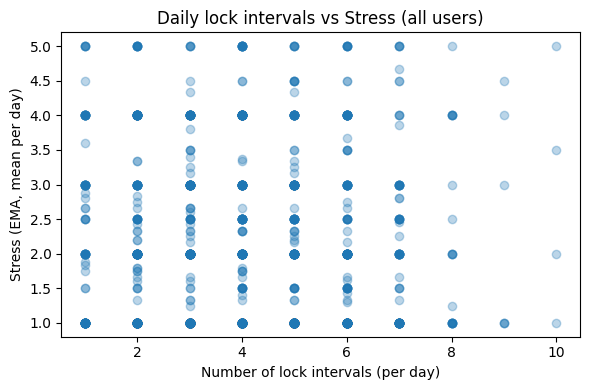

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(stress_df["n_lock_intervals"], stress_df["Stress"], alpha=0.3)
plt.xlabel("Number of lock intervals (per day)")
plt.ylabel("Stress (EMA, mean per day)")
plt.title("Daily lock intervals vs Stress (all users)")
plt.tight_layout()
plt.show()


In [31]:
prod_cols = ["Class", "Study Spaces", "Activity", "Behavior"]

# Count how many productivity-related EMAs exist per row
daily_merged["prod_n"] = daily_merged[prod_cols].notna().sum(axis=1)

# Compute productivity score only when at least 1 productivity EMA exists
daily_merged["Productivity"] = (
    daily_merged[prod_cols].mean(axis=1, skipna=True)
)

print("Productivity coverage:", daily_merged["Productivity"].notna().mean())
daily_merged[["user_id", "date", "Productivity"] + prod_cols].head()


Productivity coverage: 0.2983425414364641


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,date,Productivity,Class,Study Spaces,Activity,Behavior
0,u00,2013-03-27,3.0,NaN,NaN,NaN,3.0
1,u00,2013-03-28,2.5,NaN,NaN,2.0,3.0
2,u00,2013-03-29,2.0,NaN,NaN,1.0,3.0
3,u00,2013-03-30,2.0,NaN,NaN,2.0,NaN
4,u00,2013-03-31,NaN,NaN,NaN,NaN,NaN


In [32]:
productivity_df = daily_merged.dropna(subset=["Productivity"]).copy()

productivity_df = productivity_df[[
    "user_id", "date",
    "n_lock_intervals",
    "mean_lock_duration_min",
    "total_lock_duration_min",
    "Productivity"
]]

productivity_df.head(), productivity_df.shape


(  user_id        date  n_lock_intervals  mean_lock_duration_min  \
 0     u00  2013-03-27                 5              118.140000   
 1     u00  2013-03-28                 1               81.400000   
 2     u00  2013-03-29                 6              112.452778   
 3     u00  2013-03-30                 4              110.800000   
 5     u00  2013-04-02                 6              109.452778   
 
    total_lock_duration_min  Productivity  
 0               590.700000           3.0  
 1                81.400000           2.5  
 2               674.716667           2.0  
 3               443.200000           2.0  
 5               656.716667           3.0  ,
 (378, 6))

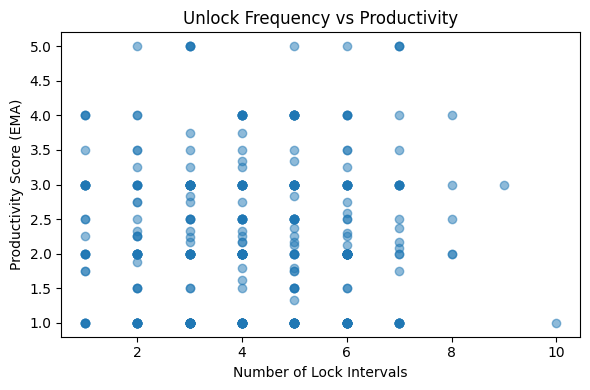

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(productivity_df["n_lock_intervals"], productivity_df["Productivity"], alpha=0.5)
plt.xlabel("Number of Lock Intervals")
plt.ylabel("Productivity Score (EMA)")
plt.title("Unlock Frequency vs Productivity")
plt.tight_layout()
plt.show()


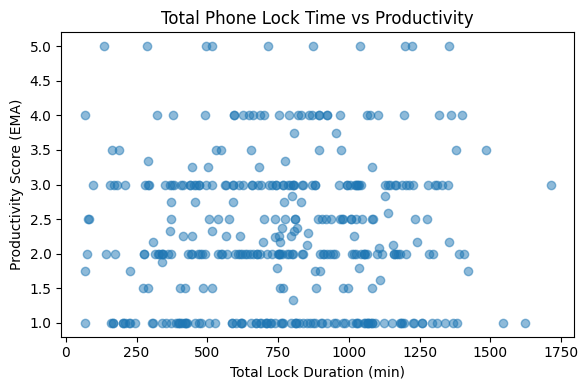

In [34]:
plt.figure(figsize=(6,4))
plt.scatter(productivity_df["total_lock_duration_min"], productivity_df["Productivity"], alpha=0.5)
plt.xlabel("Total Lock Duration (min)")
plt.ylabel("Productivity Score (EMA)")
plt.title("Total Phone Lock Time vs Productivity")
plt.tight_layout()
plt.show()


In [36]:
user_prod_corrs = []

for uid, sub in productivity_df.groupby("user_id"):
    if sub["n_lock_intervals"].nunique() > 3:
        corr = sub[["n_lock_intervals", "Productivity"]].corr().iloc[0, 1]
        user_prod_corrs.append({"user_id": uid, "corr_lock_productivity": corr})

user_prod_corrs_df = pd.DataFrame(user_prod_corrs).dropna()
user_prod_corrs_df.sort_values("corr_lock_productivity").head(), user_prod_corrs_df.sort_values("corr_lock_productivity").tail()


(   user_id  corr_lock_productivity
 18     u25               -0.548339
 32     u58               -0.344447
 28     u52               -0.336228
 13     u18               -0.326464
 3      u03               -0.315026,
    user_id  corr_lock_productivity
 1      u01                0.427036
 5      u07                0.437234
 17     u24                0.508218
 9      u14                0.681104
 26     u46                0.801784)

In [37]:
# linear regression model
import statsmodels.api as sm

df = productivity_df.dropna()

X = df[["n_lock_intervals", "mean_lock_duration_min", "total_lock_duration_min"]]
X = sm.add_constant(X)
y = df["Productivity"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5692
Date:                Wed, 03 Dec 2025   Prob (F-statistic):              0.636
Time:                        05:15:51   Log-Likelihood:                -545.43
No. Observations:                 378   AIC:                             1099.
Df Residuals:                     374   BIC:                             1115.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


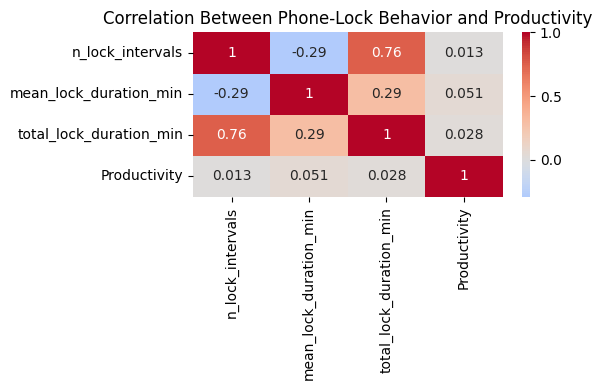

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = productivity_df[[
    "n_lock_intervals",
    "mean_lock_duration_min",
    "total_lock_duration_min",
    "Productivity"
]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Phone-Lock Behavior and Productivity")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


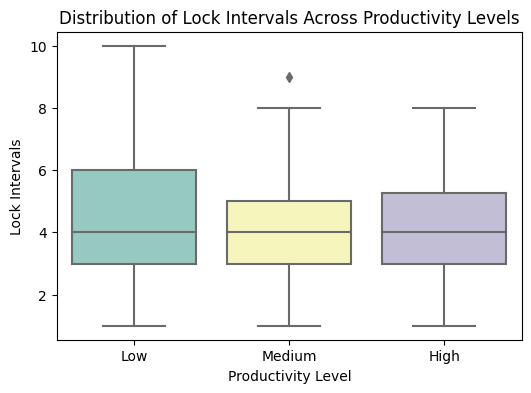

In [43]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=productivity_df,
    x="prod_bin",
    y="n_lock_intervals",
    palette="Set3"
)
plt.title("Distribution of Lock Intervals Across Productivity Levels")
plt.xlabel("Productivity Level")
plt.ylabel("Lock Intervals")
plt.show()


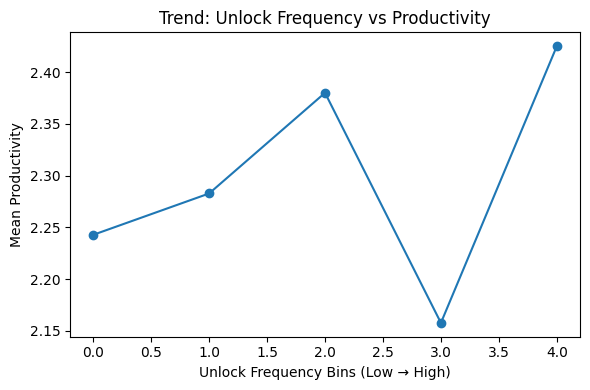

In [44]:
# Create 5 bins of unlock intervals
productivity_df["unlock_bin"] = pd.qcut(
    productivity_df["n_lock_intervals"],
    q=5,
    labels=False
)

bin_means = productivity_df.groupby("unlock_bin")["Productivity"].mean()

plt.figure(figsize=(6,4))
plt.plot(bin_means.index, bin_means.values, marker="o")
plt.xlabel("Unlock Frequency Bins (Low → High)")
plt.ylabel("Mean Productivity")
plt.title("Trend: Unlock Frequency vs Productivity")
plt.tight_layout()
plt.show()


In [46]:
print("Daily merged shape:", daily_merged.shape)

# How many rows contain Productivity (non-missing)
n_prod = productivity_df.shape[0]

# How many total users & days
n_users = productivity_df["user_id"].nunique()
n_days = productivity_df["date"].nunique()

print(f"Rows used for productivity analysis: {n_prod}")
print(f"Unique users included: {n_users}")
print(f"Unique days included: {n_days}")

# Show missingness percentage
coverage = n_prod / daily_merged.shape[0]
print(f"Coverage of Productivity EMA over all days: {coverage:.3f}")


Daily merged shape: (1267, 15)
Rows used for productivity analysis: 378
Unique users included: 48
Unique days included: 22
Coverage of Productivity EMA over all days: 0.298


In [47]:
# Select productivity-related variables
prod_vars = [
    "Study Spaces",
    "Class",
    "Sleep",
    "Activity",
    "n_lock_intervals",
    "mean_lock_duration_min",
    "total_lock_duration_min"
]

prod_df = daily_merged[["user_id", "date"] + prod_vars].copy()
print(prod_df.shape)
prod_df.head()


(1267, 9)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,date,Study Spaces,Class,Sleep,Activity,n_lock_intervals,mean_lock_duration_min,total_lock_duration_min
0,u00,2013-03-27,NaN,NaN,NaN,NaN,5,118.140000,590.700000
1,u00,2013-03-28,NaN,NaN,NaN,2.0,1,81.400000,81.400000
2,u00,2013-03-29,NaN,NaN,NaN,1.0,6,112.452778,674.716667
3,u00,2013-03-30,NaN,NaN,NaN,2.0,4,110.800000,443.200000
4,u00,2013-03-31,NaN,NaN,NaN,NaN,6,204.441667,1226.650000


In [48]:
prod_vars = ["Study Spaces","Class","Sleep","Activity",
             "n_lock_intervals","mean_lock_duration_min","total_lock_duration_min"]

prod_df[prod_vars].isna().mean()


Study Spaces               0.921863
Class                      0.999211
Sleep                      0.999211
Activity                   0.835833
n_lock_intervals           0.000000
mean_lock_duration_min     0.000000
total_lock_duration_min    0.000000
dtype: float64

In [49]:
valid_vars = [
    "Activity", 
    "n_lock_intervals",
    "mean_lock_duration_min",
    "total_lock_duration_min"
]

prod_df2 = daily_merged[["user_id","date"] + valid_vars].copy()

# Impute Activity only
prod_df2["Activity"] = prod_df2["Activity"].fillna(prod_df2["Activity"].mean())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

prod_df2[[v+"_z" for v in valid_vars]] = scaler.fit_transform(prod_df2[valid_vars])

prod_df2["ProductivityScore"] = prod_df2[[v+"_z" for v in valid_vars]].mean(axis=1)

prod_df2.head()


,user_id,date,Activity,n_lock_intervals,mean_lock_duration_min,total_lock_duration_min,Activity_z,n_lock_intervals_z,mean_lock_duration_min_z,total_lock_duration_min_z,ProductivityScore
0,u00,2013-03-27,2.065304,5,118.140000,590.700000,-1.060367e-15,0.523743,-0.928426,-0.416632,-0.205329
1,u00,2013-03-28,2.000000,1,81.400000,81.400000,-1.559298e-01,-1.666297,-1.395505,-1.880109,-1.274460
2,u00,2013-03-29,1.000000,6,112.452778,674.716667,-2.543664e+00,1.071253,-1.000728,-0.175210,-0.662087
3,u00,2013-03-30,2.000000,4,110.800000,443.200000,-1.559298e-01,-0.023767,-1.021740,-0.840474,-0.510478
4,u00,2013-03-31,2.065304,6,204.441667,1226.650000,-1.060367e-15,1.071253,0.168736,1.410774,0.662691


In [52]:
prod_df.columns


Index(['user_id', 'date', 'Study Spaces', 'Class', 'Sleep', 'Activity',
       'n_lock_intervals', 'mean_lock_duration_min',
       'total_lock_duration_min'],
      dtype='object')

In [54]:
from scipy.stats import zscore

# Copy your current dataframe (the one you printed)
df = daily_merged[[
    "user_id", "date",
    "Activity",
    "n_lock_intervals",
    "mean_lock_duration_min",
    "total_lock_duration_min"
]].dropna(subset=["Activity"])   # Activity must be present

# Z-score normalization
df["Activity_z"] = zscore(df["Activity"])
df["n_lock_intervals_z"] = zscore(df["n_lock_intervals"])
df["mean_lock_duration_min_z"] = zscore(df["mean_lock_duration_min"])
df["total_lock_duration_min_z"] = zscore(df["total_lock_duration_min"])

# Composite Productivity Score
df["ProductivityScore"] = (
    df["Activity_z"]
    + df["n_lock_intervals_z"]
    - df["mean_lock_duration_min_z"]
    - df["total_lock_duration_min_z"]
)

# Save final productivity dataframe
prod_df = df.copy()

prod_df.head()


,user_id,date,Activity,n_lock_intervals,mean_lock_duration_min,total_lock_duration_min,Activity_z,n_lock_intervals_z,mean_lock_duration_min_z,total_lock_duration_min_z,ProductivityScore
1,u00,2013-03-28,2.0,1,81.400000,81.400000,-0.063179,-1.793205,-1.488224,-2.176656,1.808496
2,u00,2013-03-29,1.0,6,112.452778,674.716667,-1.030631,0.945316,-1.073238,-0.311080,1.299003
3,u00,2013-03-30,2.0,4,110.800000,443.200000,-0.063179,-0.150092,-1.095325,-1.039042,1.921096
5,u00,2013-04-02,3.0,6,109.452778,656.716667,0.904273,0.945316,-1.113329,-0.367677,3.330596
6,u00,2013-04-03,1.0,6,120.950000,725.700000,-1.030631,0.945316,-0.959682,-0.150772,1.025139


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


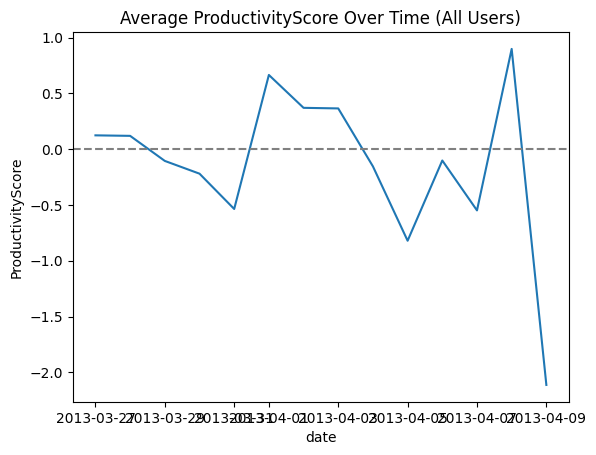

In [55]:
prod_df['date'] = pd.to_datetime(prod_df['date'])

prod_daily_mean = (
    prod_df.groupby('date')['ProductivityScore']
    .mean()
    .reset_index()
)

sns.lineplot(data=prod_daily_mean, x='date', y='ProductivityScore')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Average ProductivityScore Over Time (All Users)")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


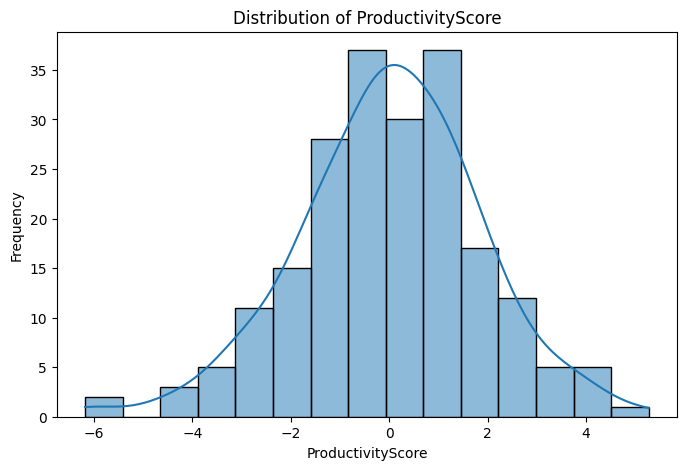

In [56]:
plt.figure(figsize=(8,5))
sns.histplot(prod_df["ProductivityScore"], kde=True)
plt.title("Distribution of ProductivityScore")
plt.xlabel("ProductivityScore")
plt.ylabel("Frequency")
plt.show()


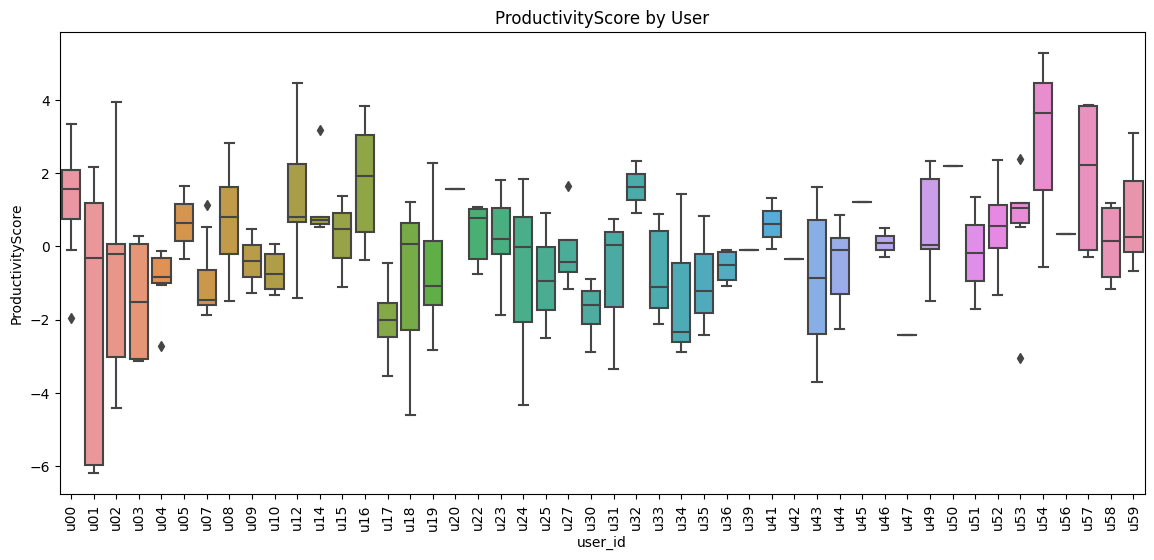

In [57]:
plt.figure(figsize=(14,6))
sns.boxplot(
    data=prod_df,
    x="user_id",
    y="ProductivityScore"
)
plt.xticks(rotation=90)
plt.title("ProductivityScore by User")
plt.show()


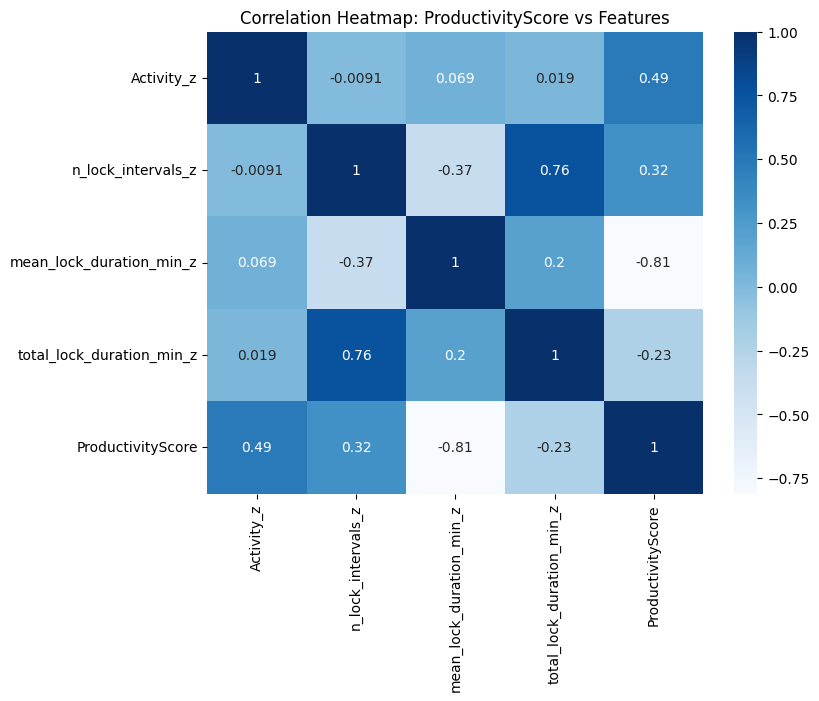

In [58]:
corr_cols = [
    "Activity_z", "n_lock_intervals_z",
    "mean_lock_duration_min_z",
    "total_lock_duration_min_z",
    "ProductivityScore"
]

plt.figure(figsize=(8,6))
sns.heatmap(prod_df[corr_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap: ProductivityScore vs Features")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


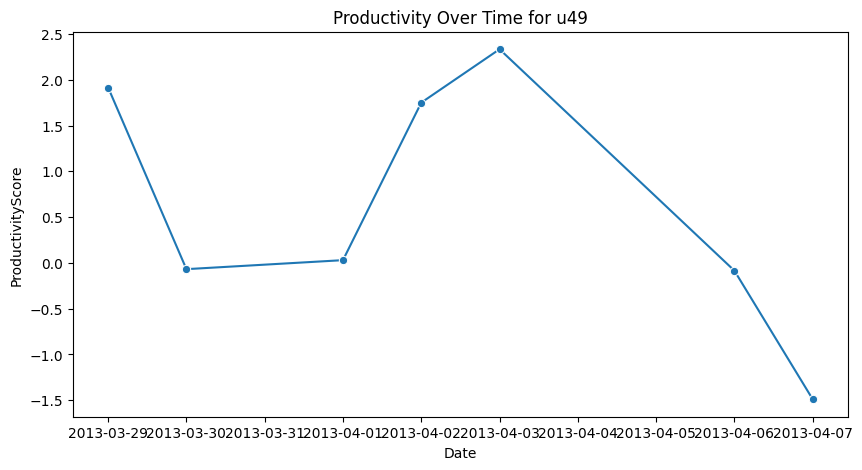

In [59]:
user_example = prod_df["user_id"].sample(1).iloc[0]
user_data = prod_df[prod_df["user_id"] == user_example]

plt.figure(figsize=(10,5))
sns.lineplot(data=user_data, x="date", y="ProductivityScore", marker="o")
plt.title(f"Productivity Over Time for {user_example}")
plt.xlabel("Date")
plt.ylabel("ProductivityScore")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


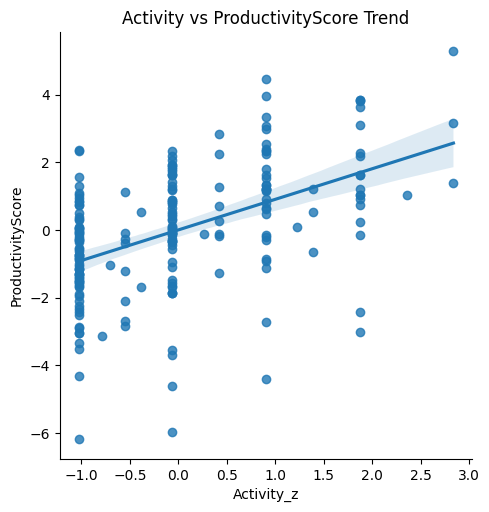

In [60]:
sns.lmplot(
    data=prod_df,
    x="Activity_z",
    y="ProductivityScore",
    height=5,
)
plt.title("Activity vs ProductivityScore Trend")
plt.show()


In [62]:
prod_df["ProductivityScore_norm"] = zscore(prod_df["ProductivityScore"])

In [63]:
prod_df["ProductivityScore"] = (
    2*prod_df["Activity_z"] +
    2*prod_df["n_lock_intervals_z"] -
    prod_df["mean_lock_duration_min_z"] -
    prod_df["total_lock_duration_min_z"]
)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


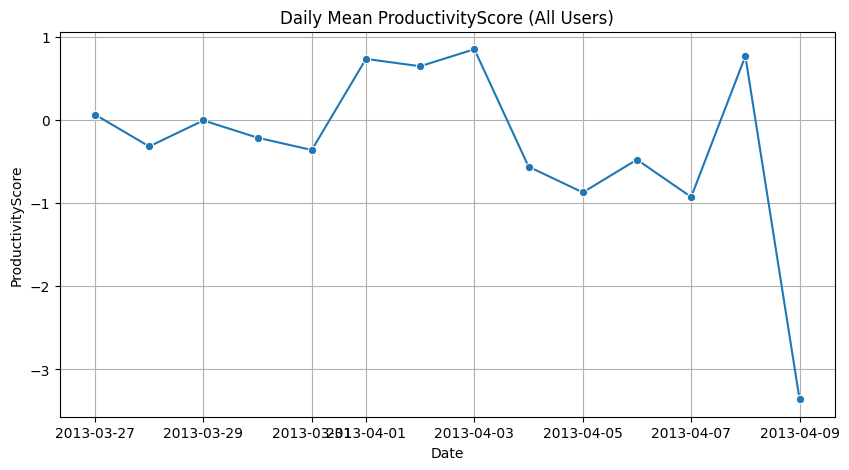

In [64]:
# Global Daily Productivity Trend
# Ensure datetime format
prod_df['date'] = pd.to_datetime(prod_df['date'])

# Daily mean across all users
prod_daily = (
    prod_df.groupby("date")["ProductivityScore"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(data=prod_daily, x="date", y="ProductivityScore", marker="o")
plt.title("Daily Mean ProductivityScore (All Users)")
plt.xlabel("Date")
plt.ylabel("ProductivityScore")
plt.grid(True)
plt.show()


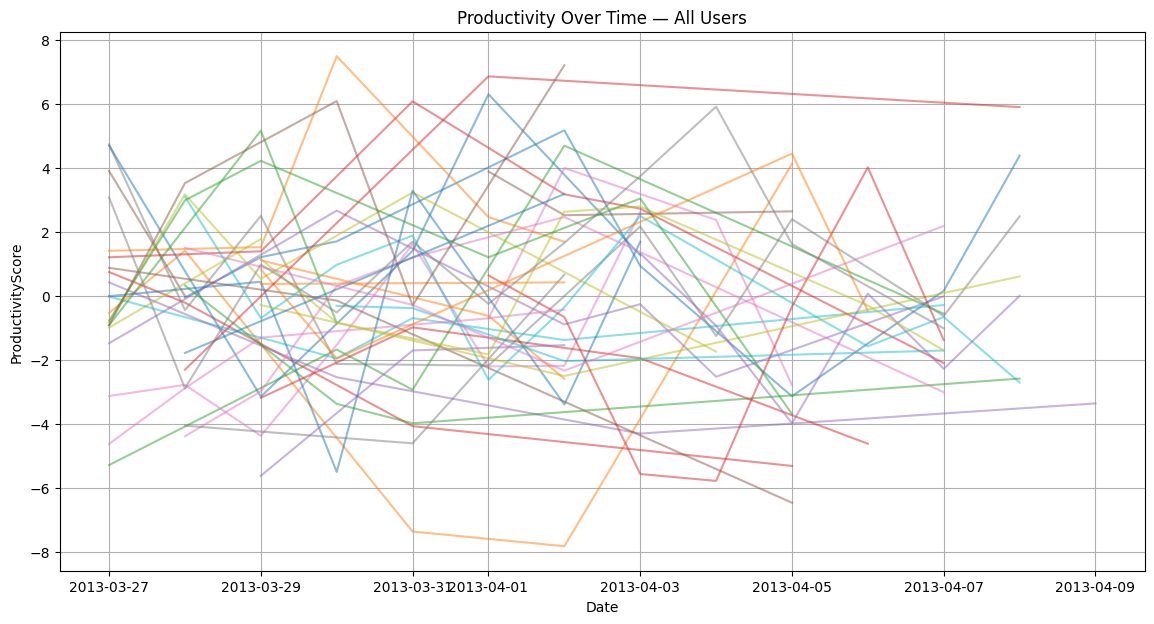

In [65]:
# per user productivity
plt.figure(figsize=(14,7))

for uid, temp in prod_df.groupby("user_id"):
    plt.plot(temp["date"], temp["ProductivityScore"], alpha=0.5)

plt.title("Productivity Over Time — All Users")
plt.xlabel("Date")
plt.ylabel("ProductivityScore")
plt.grid(True)
plt.show()


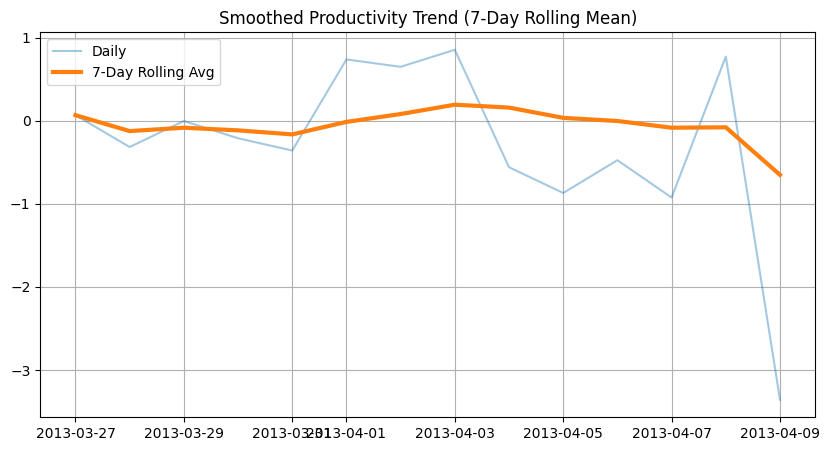

In [66]:
prod_daily["roll7"] = prod_daily["ProductivityScore"].rolling(7, min_periods=1).mean()

plt.figure(figsize=(10,5))
plt.plot(prod_daily["date"], prod_daily["ProductivityScore"], alpha=0.4, label="Daily")
plt.plot(prod_daily["date"], prod_daily["roll7"], linewidth=3, label="7-Day Rolling Avg")
plt.title("Smoothed Productivity Trend (7-Day Rolling Mean)")
plt.legend()
plt.grid(True)
plt.show()


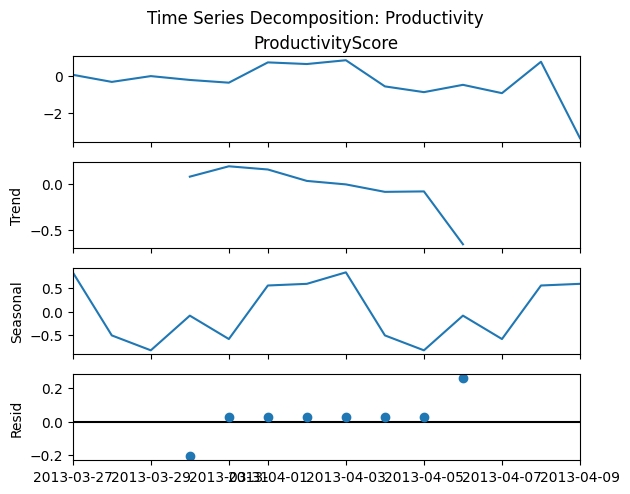

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Need date as index, sorted
ts = prod_daily.set_index("date")["ProductivityScore"].asfreq("D").interpolate()

decomp = seasonal_decompose(ts, model="additive", period=7)  # weekly pattern

decomp.plot()
plt.suptitle("Time Series Decomposition: Productivity", y=1.02)
plt.show()


In [69]:
# Ensure datetime format
prod_df['date'] = pd.to_datetime(prod_df['date'])

# Daily mean across users
prod_daily = (
    prod_df.groupby("date")["ProductivityScore"]
    .mean()
    .reset_index()
    .sort_values("date")
)

# Make time series with daily frequency
ts = prod_daily.set_index("date")["ProductivityScore"].asfreq("D")

# Fill missing days with interpolation
ts = ts.interpolate()

ts.tail()


date
2013-04-05   -0.869966
2013-04-06   -0.475454
2013-04-07   -0.925012
2013-04-08    0.770773
2013-04-09   -3.357909
Freq: D, Name: ProductivityScore, dtype: float64

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 13 must be < 7.

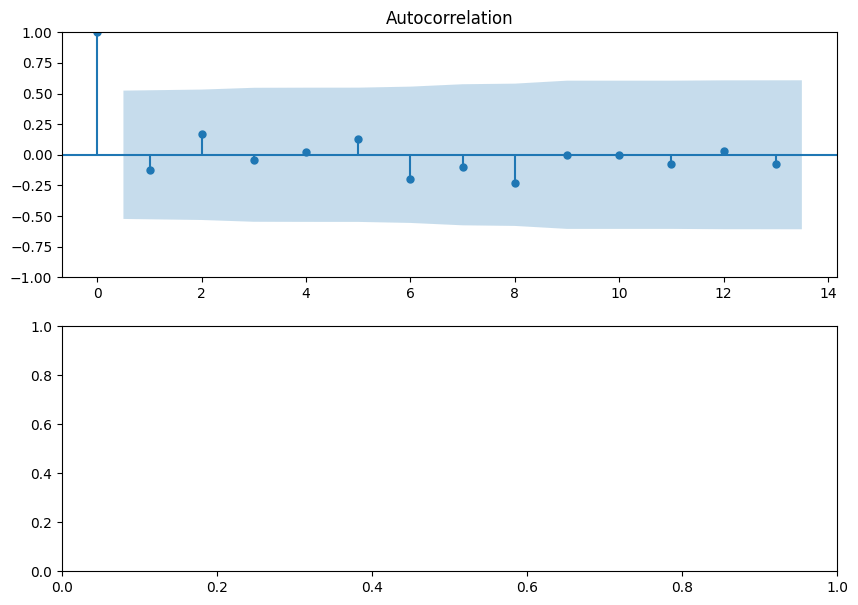

In [72]:
max_lags = len(ts) - 1  # safe lag count

fig, ax = plt.subplots(2,1, figsize=(10,7))
plot_acf(ts, ax=ax[0], lags=max_lags)
plot_pacf(ts, ax=ax[1], lags=max_lags)
plt.show()


In [73]:
!pip install pmdarima


^C


In [74]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA

best_aic = float("inf")
best_order = None
best_model = None

# Small grid since data is short
for p in range(0,3):
    for d in range(0,2):
        for q in range(0,3):
            try:
                model = ARIMA(ts, order=(p,d,q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_order = (p,d,q)
                    best_model = model
            except:
                continue

print("Best ARIMA order:", best_order)
print("Best AIC:", best_aic)


Best ARIMA order: (1, 1, 0)
Best AIC: 43.67315259704226


In [75]:
print(best_model.summary())


                               SARIMAX Results                                
Dep. Variable:      ProductivityScore   No. Observations:                   14
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -19.837
Date:                Wed, 03 Dec 2025   AIC                             43.673
Time:                        05:41:08   BIC                             44.803
Sample:                    03-27-2013   HQIC                            43.441
                         - 04-09-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8189      0.291     -2.814      0.005      -1.389      -0.249
sigma2         1.1371      0.544      2.091      0.037       0.071       2.203
Ljung-Box (L1) (Q):                   0.26   Jarque-

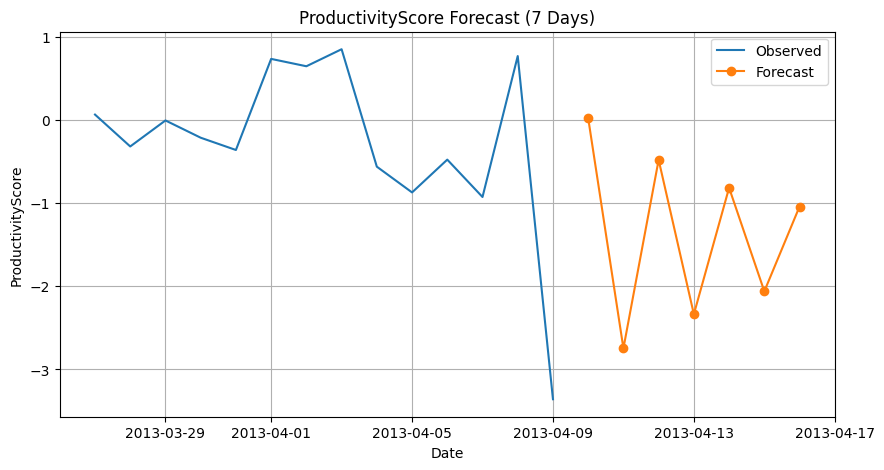

2013-04-10    0.023153
2013-04-11   -2.745667
2013-04-12   -0.478224
2013-04-13   -2.335079
2013-04-14   -0.814463
2013-04-15   -2.059727
2013-04-16   -1.039955
Freq: D, Name: predicted_mean, dtype: float64

In [111]:
forecast = best_model.forecast(steps=7)

plt.figure(figsize=(10,5))
plt.plot(ts.index, ts, label="Observed")
plt.plot(forecast.index, forecast, marker="o", label="Forecast")

plt.title("ProductivityScore Forecast (7 Days)")
plt.xlabel("Date")
plt.ylabel("ProductivityScore")
plt.legend()
plt.grid(True)
plt.show()

forecast


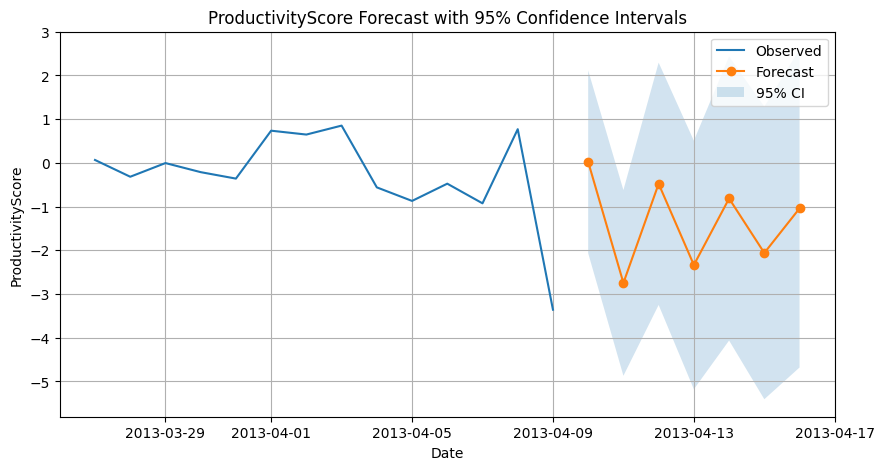

(2013-04-10    0.023153
 2013-04-11   -2.745667
 2013-04-12   -0.478224
 2013-04-13   -2.335079
 2013-04-14   -0.814463
 2013-04-15   -2.059727
 2013-04-16   -1.039955
 Freq: D, Name: predicted_mean, dtype: float64,
             lower ProductivityScore  upper ProductivityScore
 2013-04-10                -2.066853                 2.113159
 2013-04-11                -4.869662                -0.621672
 2013-04-12                -3.249512                 2.293064
 2013-04-13                -5.177577                 0.507418
 2013-04-14                -4.062802                 2.433876
 2013-04-15                -5.405720                 1.286267
 2013-04-16                -4.679833                 2.599924)

In [77]:
from statsmodels.tsa.arima.model import ARIMA

# If you still have best_model, you can reuse it.
# Otherwise, refit quickly:
best_model = ARIMA(ts, order=(1, 1, 0)).fit()

n_steps = 7
forecast_res = best_model.get_forecast(steps=n_steps)

pred_mean = forecast_res.predicted_mean
pred_ci = forecast_res.conf_int()  # DataFrame with lower and upper bounds

plt.figure(figsize=(10, 5))
plt.plot(ts.index, ts, label="Observed")
plt.plot(pred_mean.index, pred_mean, marker="o", label="Forecast")

# Confidence interval shading
plt.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    alpha=0.2,
    label="95% CI",
)

plt.title("ProductivityScore Forecast with 95% Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("ProductivityScore")
plt.legend()
plt.grid(True)
plt.show()

pred_mean, pred_ci


                                     SARIMAX Results                                     
Dep. Variable:                 ProductivityScore   No. Observations:                   14
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 7)   Log Likelihood                  -8.575
Date:                           Wed, 03 Dec 2025   AIC                             23.150
Time:                                   05:46:36   BIC                             21.978
Sample:                               03-27-2013   HQIC                            20.005
                                    - 04-09-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3394      0.604     -2.218      0.027      -2.523      -0.156
ar.S.L7       -0.3950      0.972     -0.407

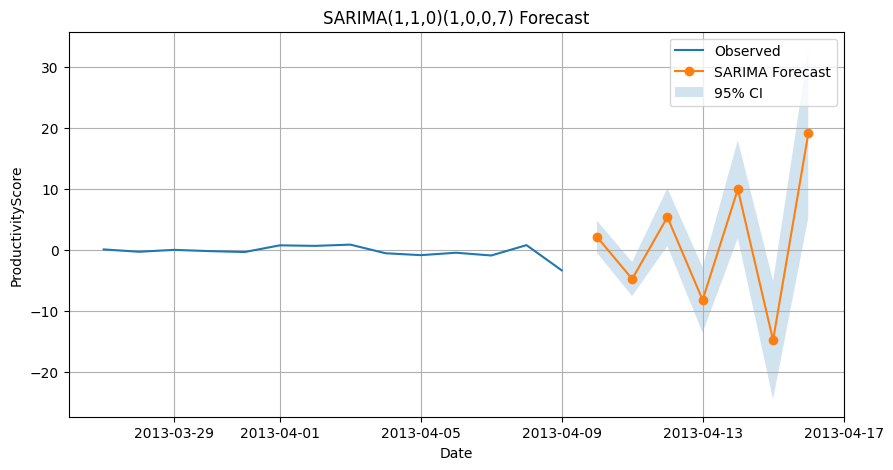

2013-04-10     2.137811
2013-04-11    -4.773313
2013-04-12     5.353251
2013-04-13    -8.201821
2013-04-14     9.922329
2013-04-15   -14.784699
2013-04-16    19.040959
Freq: D, Name: predicted_mean, dtype: float64

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Simple SARIMA(1,1,0) with weekly seasonality (period=7)
sarima_model = SARIMAX(
    ts,
    order=(1, 1, 0),
    seasonal_order=(1, 0, 0, 7),
    enforce_stationarity=False,
    enforce_invertibility=False,
).fit(disp=False)

print(sarima_model.summary())

# Forecast next 7 days
sarima_forecast = sarima_model.get_forecast(steps=7)
sarima_mean = sarima_forecast.predicted_mean
sarima_ci = sarima_forecast.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(ts.index, ts, label="Observed")
plt.plot(sarima_mean.index, sarima_mean, marker="o", label="SARIMA Forecast")
plt.fill_between(
    sarima_ci.index,
    sarima_ci.iloc[:, 0],
    sarima_ci.iloc[:, 1],
    alpha=0.2,
    label="95% CI",
)

plt.title("SARIMA(1,1,0)(1,0,0,7) Forecast")
plt.xlabel("Date")
plt.ylabel("ProductivityScore")
plt.legend()
plt.grid(True)
plt.show()

sarima_mean


In [79]:
!pip install prophet

05:47:11 - cmdstanpy - INFO - Chain [1] start processing
05:47:11 - cmdstanpy - INFO - Chain [1] done processing


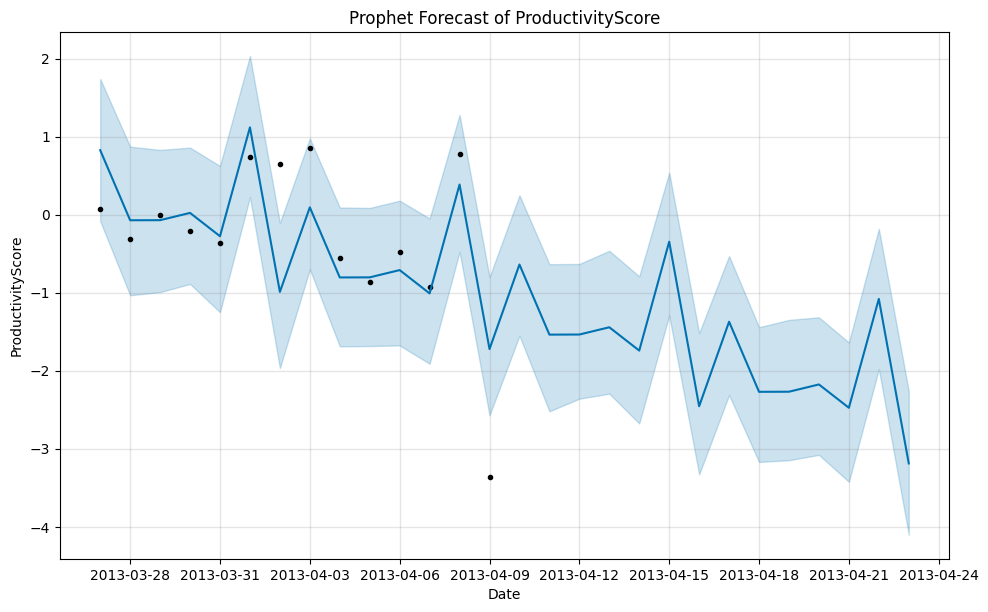

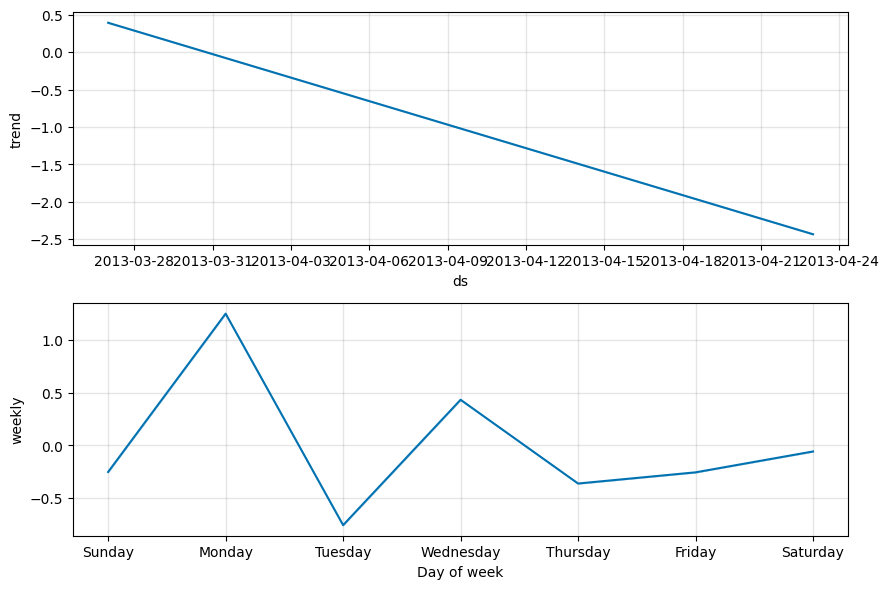

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
23,2013-04-19,-2.015045,-3.148305,-1.349860,-2.015045,-2.015045,-0.255245,-0.255245,-0.255245,-0.255245,-0.255245,-0.255245,0.0,0.0,0.0,-2.270291
24,2013-04-20,-2.119737,-3.080015,-1.317149,-2.119737,-2.119737,-0.057403,-0.057403,-0.057403,-0.057403,-0.057403,-0.057403,0.0,0.0,0.0,-2.177140
25,2013-04-21,-2.224428,-3.425009,-1.639285,-2.224428,-2.224428,-0.251591,-0.251591,-0.251591,-0.251591,-0.251591,-0.251591,0.0,0.0,0.0,-2.476019
26,2013-04-22,-2.329119,-1.980253,-0.182081,-2.329120,-2.329119,1.248508,1.248508,1.248508,1.248508,1.248508,1.248508,0.0,0.0,0.0,-1.080612
27,2013-04-23,-2.433811,-4.103776,-2.262638,-2.433811,-2.433811,-0.755629,-0.755629,-0.755629,-0.755629,-0.755629,-0.755629,0.0,0.0,0.0,-3.189440


In [80]:
from prophet import Prophet

# Prepare data for Prophet
prod_daily = (
    prod_df.groupby("date")["ProductivityScore"]
    .mean()
    .reset_index()
    .sort_values("date")
)

df_prophet = prod_daily.rename(columns={"date": "ds", "ProductivityScore": "y"})

# Basic Prophet model with weekly seasonality
m = Prophet(
    weekly_seasonality=True,
    daily_seasonality=False,
    yearly_seasonality=False
)
m.fit(df_prophet)

# Forecast next 14 days
future = m.make_future_dataframe(periods=14, freq="D")
forecast = m.predict(future)

# Plot forecast
fig1 = m.plot(forecast)
plt.title("Prophet Forecast of ProductivityScore")
plt.xlabel("Date")
plt.ylabel("ProductivityScore")
plt.show()

# Components (trend, weekly pattern)
fig2 = m.plot_components(forecast)
plt.show()

forecast.tail()


In [81]:
# build per user ARIMA model
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

user_forecasts = []

for uid, grp in prod_df.groupby("user_id"):
    # Build per-user series
    ts_u = (
        grp.sort_values("date")
        .set_index("date")["ProductivityScore"]
        .asfreq("D")
        .interpolate()
    )
    
    # Skip very short series
    if len(ts_u) < 10:
        continue
    
    best_aic = np.inf
    best_order = None
    best_model_u = None
    
    # Tiny grid search for each user
    for p in range(0, 3):
        for d in range(0, 2):
            for q in range(0, 3):
                try:
                    model_u = ARIMA(ts_u, order=(p, d, q)).fit()
                    if model_u.aic < best_aic:
                        best_aic = model_u.aic
                        best_order = (p, d, q)
                        best_model_u = model_u
                except:
                    continue
    
    if best_model_u is None:
        continue
    
    # Forecast next 3 days
    fc_u = best_model_u.forecast(steps=3)
    
    for date_fc, value_fc in fc_u.items():
        user_forecasts.append({
            "user_id": uid,
            "forecast_date": date_fc,
            "forecast_ProductivityScore": value_fc,
            "best_order": best_order,
            "aic": best_aic,
        })

user_forecast_df = pd.DataFrame(user_forecasts)
user_forecast_df.head()


,user_id,forecast_date,forecast_ProductivityScore,best_order,aic
0,u00,2013-04-09,5.798160,"(2, 0, 1)",49.263194
1,u00,2013-04-10,4.867690,"(2, 0, 1)",49.263194
2,u00,2013-04-11,2.283404,"(2, 0, 1)",49.263194
3,u01,2013-04-06,5.242184,"(0, 1, 2)",44.105504
4,u01,2013-04-07,6.001155,"(0, 1, 2)",44.105504


In [82]:
# Merge prod_df with EMA daily wide
# Make sure date types match
prod_df["date"] = pd.to_datetime(prod_df["date"])
ema_daily_wide["date"] = pd.to_datetime(ema_daily_wide["date"])

prod_ema = prod_df.merge(
    ema_daily_wide[
        ["user_id", "date", "Stress", "Sleep", "Mood 2", "Activity", "Social"]
    ],
    on=["user_id", "date"],
    how="left",
)

prod_ema.head()


,user_id,date,Activity_x,n_lock_intervals,mean_lock_duration_min,total_lock_duration_min,Activity_z,n_lock_intervals_z,mean_lock_duration_min_z,total_lock_duration_min_z,ProductivityScore,ProductivityScore_norm,Stress,Sleep,Mood 2,Activity_y,Social
0,u00,2013-03-28,2.0,1,81.400000,81.400000,-0.063179,-1.793205,-1.488224,-2.176656,-0.047887,0.977401,2.666667,NaN,NaN,2.0,NaN
1,u00,2013-03-29,1.0,6,112.452778,674.716667,-1.030631,0.945316,-1.073238,-0.311080,1.213689,0.702046,2.500000,NaN,NaN,1.0,NaN
2,u00,2013-03-30,2.0,4,110.800000,443.200000,-0.063179,-0.150092,-1.095325,-1.039042,1.707825,1.038256,4.000000,NaN,NaN,2.0,NaN
3,u00,2013-04-02,3.0,6,109.452778,656.716667,0.904273,0.945316,-1.113329,-0.367677,5.180185,1.800019,1.000000,NaN,NaN,3.0,NaN
4,u00,2013-04-03,1.0,6,120.950000,725.700000,-1.030631,0.945316,-0.959682,-0.150772,0.939825,0.554036,1.500000,NaN,NaN,1.0,NaN


In [85]:
# Quick check
prod_ema.columns


Index(['user_id', 'date', 'Activity_x', 'n_lock_intervals',
       'mean_lock_duration_min', 'total_lock_duration_min', 'Activity_z',
       'n_lock_intervals_z', 'mean_lock_duration_min_z',
       'total_lock_duration_min_z', 'ProductivityScore',
       'ProductivityScore_norm', 'Stress', 'Sleep', 'Mood 2', 'Activity_y',
       'Social'],
      dtype='object')

In [87]:
prod_ema = prod_ema.rename(columns={
    "Activity_x": "Activity_lock",   # from lock-based features
    "Activity_y": "Activity_EMA"     # from EMA responses
})


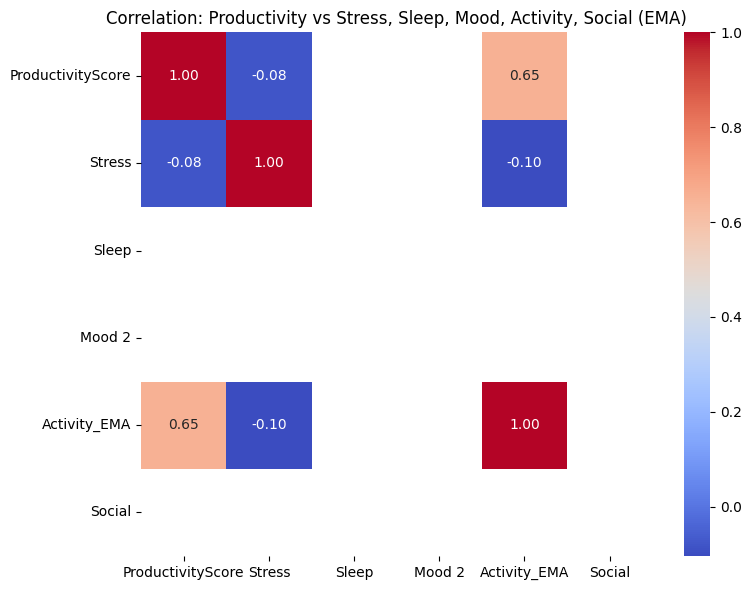

ProductivityScore    1.000000
Stress              -0.079316
Sleep                     NaN
Mood 2                    NaN
Activity_EMA         0.653169
Social                    NaN
Name: ProductivityScore, dtype: float64

In [88]:
corr_cols = [
    "ProductivityScore",
    "Stress",
    "Sleep",
    "Mood 2",
    "Activity_EMA",
    "Social",
]

corr_matrix = prod_ema[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Productivity vs Stress, Sleep, Mood, Activity, Social (EMA)")
plt.tight_layout()
plt.show()

corr_matrix["ProductivityScore"]


In [89]:
import numpy as np
import pandas as pd

corr_results = []

ema_vars = ["Stress", "Sleep", "Mood 2", "Activity_EMA", "Social"]

for uid, grp in prod_ema.groupby("user_id"):
    for var in ema_vars:
        sub = grp[["ProductivityScore", var]].dropna()
        
        # Skip if too few points
        if len(sub) < 5:
            continue
        
        r = sub["ProductivityScore"].corr(sub[var])
        
        corr_results.append({
            "user_id": uid,
            "variable": var,
            "correlation": r
        })

corr_df = pd.DataFrame(corr_results)
corr_df.head()


,user_id,variable,correlation
0,u00,Stress,-0.078403
1,u00,Activity_EMA,0.715181
2,u01,Activity_EMA,0.760909
3,u02,Activity_EMA,-0.045188
4,u04,Stress,-0.326620


In [90]:
corr_summary = (
    corr_df.groupby("variable")["correlation"]
    .agg(["mean", "median", "std", "count"])
)

corr_summary


,mean,median,std,count
variable,,,,
Activity_EMA,0.620346,0.740997,0.379311,20
Stress,0.020739,0.007976,0.455135,14


In [91]:
lag_results = []

for uid, grp in prod_ema.groupby("user_id"):
    grp = grp.sort_values("date").copy()
    grp["Productivity_tomorrow"] = grp["ProductivityScore"].shift(-1)
    
    for var in ["Stress", "Activity_EMA"]:
        sub = grp[[var, "Productivity_tomorrow"]].dropna()
        
        if len(sub) < 5:
            continue
        
        r = sub[var].corr(sub["Productivity_tomorrow"])
        
        lag_results.append({
            "user_id": uid,
            "variable": var,
            "lagged_corr": r
        })

lag_df = pd.DataFrame(lag_results)
lag_df.head()


,user_id,variable,lagged_corr
0,u00,Stress,0.810228
1,u00,Activity_EMA,0.496028
2,u04,Stress,0.382820
3,u04,Activity_EMA,-0.239406
4,u07,Stress,0.696977


In [92]:
lag_summary = (
    lag_df.groupby("variable")["lagged_corr"]
    .agg(["mean", "median", "std", "count"])
)

lag_summary


,mean,median,std,count
variable,,,,
Activity_EMA,-0.035778,-0.206892,0.361289,14
Stress,0.055599,0.103387,0.523739,13


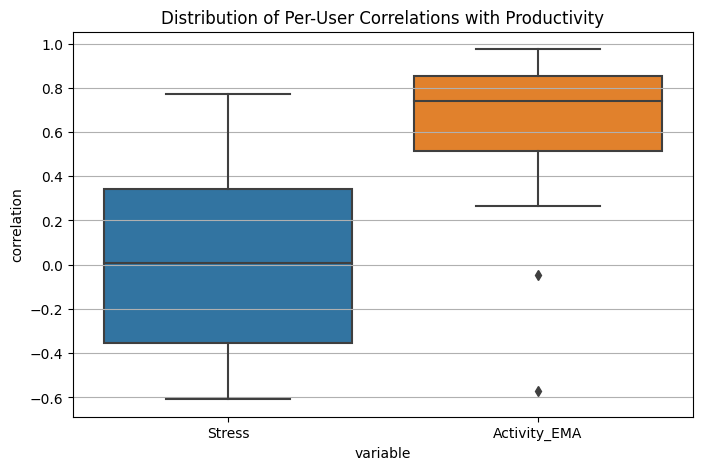

In [93]:
plt.figure(figsize=(8,5))
sns.boxplot(data=corr_df, x="variable", y="correlation")
plt.title("Distribution of Per-User Correlations with Productivity")
plt.grid(True, axis="y")
plt.show()


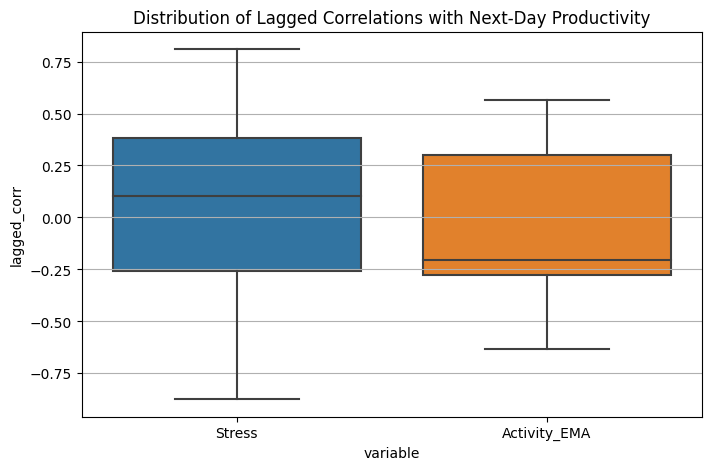

In [94]:
plt.figure(figsize=(8,5))
sns.boxplot(data=lag_df, x="variable", y="lagged_corr")
plt.title("Distribution of Lagged Correlations with Next-Day Productivity")
plt.grid(True, axis="y")
plt.show()


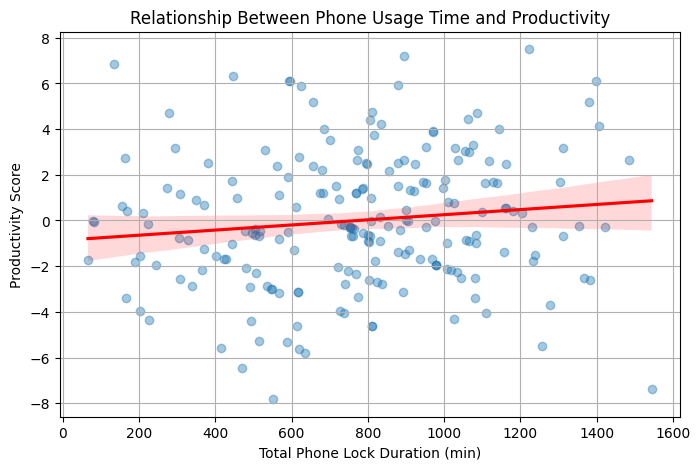

In [95]:
plt.figure(figsize=(8,5))
sns.regplot(
    data=prod_df,
    x="total_lock_duration_min",
    y="ProductivityScore",
    scatter_kws={"alpha":0.4},
    line_kws={"color":"red"}
)
plt.title("Relationship Between Phone Usage Time and Productivity")
plt.xlabel("Total Phone Lock Duration (min)")
plt.ylabel("Productivity Score")
plt.grid(True)
plt.show()


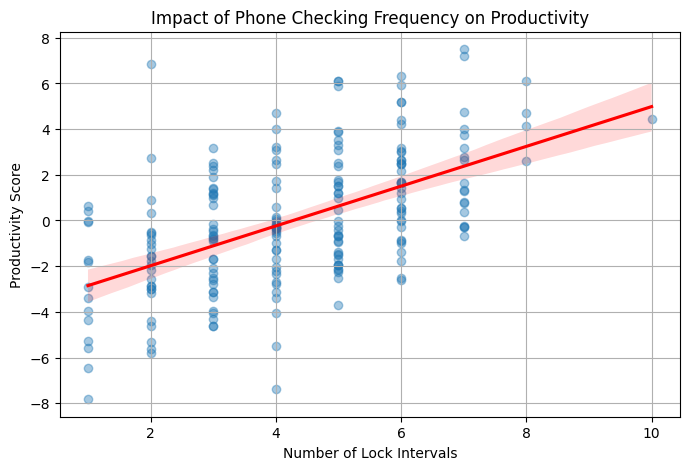

In [96]:
plt.figure(figsize=(8,5))
sns.regplot(
    data=prod_df,
    x="n_lock_intervals",
    y="ProductivityScore",
    scatter_kws={"alpha":0.4},
    line_kws={"color":"red"}
)
plt.title("Impact of Phone Checking Frequency on Productivity")
plt.xlabel("Number of Lock Intervals")
plt.ylabel("Productivity Score")
plt.grid(True)
plt.show()


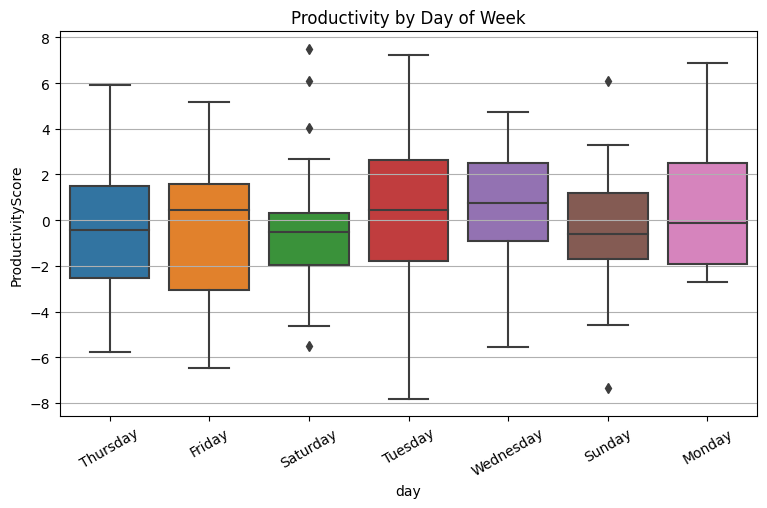

In [97]:
ts_week = prod_df.copy()
ts_week["date"] = pd.to_datetime(ts_week["date"])
ts_week["day"] = ts_week["date"].dt.day_name()

plt.figure(figsize=(9,5))
sns.boxplot(data=ts_week, x="day", y="ProductivityScore")
plt.title("Productivity by Day of Week")
plt.xticks(rotation=30)
plt.grid(axis="y")
plt.show()


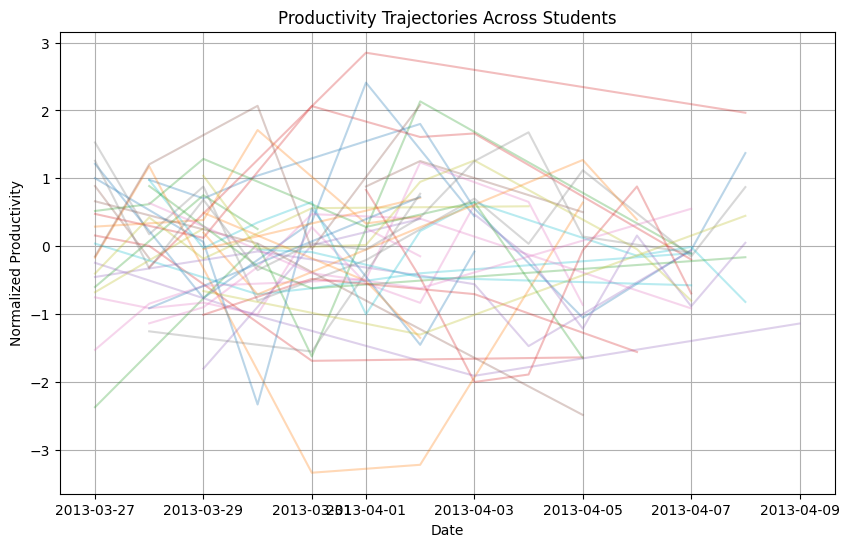

In [98]:
plt.figure(figsize=(10,6))
for uid, grp in prod_df.groupby("user_id"):
    plt.plot(grp["date"], grp["ProductivityScore_norm"], alpha=0.3)

plt.title("Productivity Trajectories Across Students")
plt.xlabel("Date")
plt.ylabel("Normalized Productivity")
plt.grid(True)
plt.show()


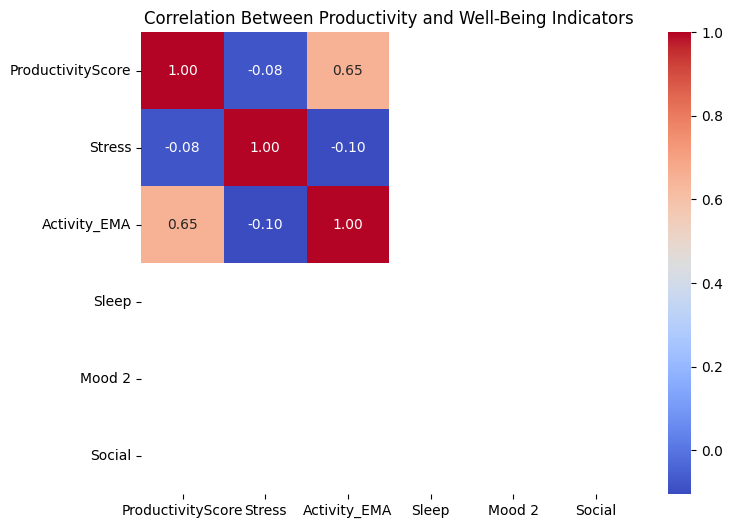

In [99]:
corr_cols = ["ProductivityScore", "Stress", "Activity_EMA", "Sleep", "Mood 2", "Social"]
corr_matrix = prod_ema[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Productivity and Well-Being Indicators")
plt.show()


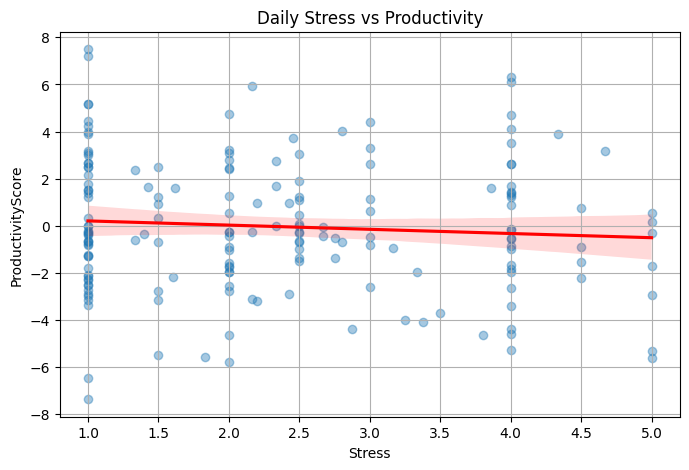

In [100]:
plt.figure(figsize=(8,5))
sns.regplot(
    data=prod_ema,
    x="Stress",
    y="ProductivityScore",
    scatter_kws={"alpha":0.4},
    line_kws={"color":"red"}
)
plt.title("Daily Stress vs Productivity")
plt.grid(True)
plt.show()


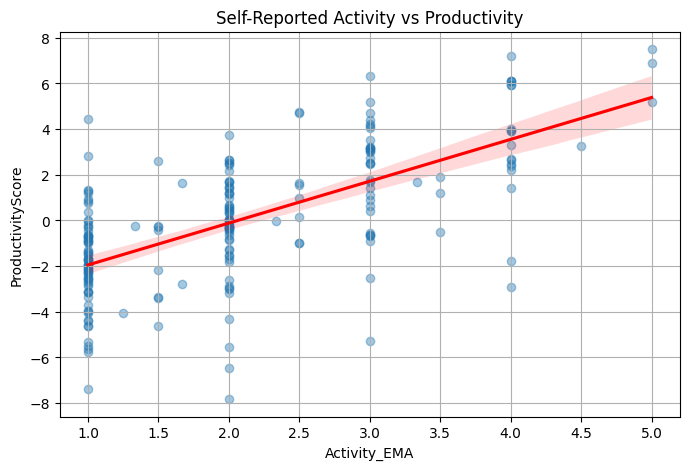

In [101]:
plt.figure(figsize=(8,5))
sns.regplot(
    data=prod_ema,
    x="Activity_EMA",
    y="ProductivityScore",
    scatter_kws={"alpha":0.4},
    line_kws={"color":"red"}
)
plt.title("Self-Reported Activity vs Productivity")
plt.grid(True)
plt.show()


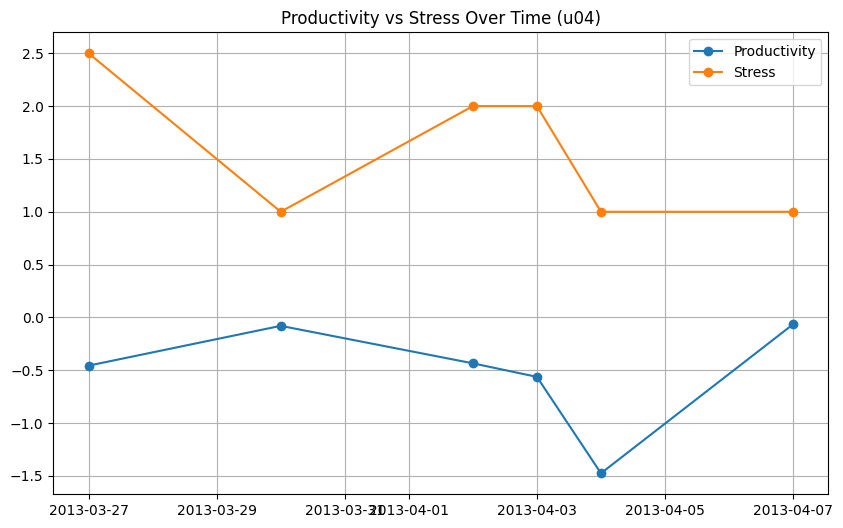

In [110]:
uid = "u04"  # pick any

temp = prod_ema[prod_ema["user_id"] == uid].sort_values("date")

plt.figure(figsize=(10,6))
plt.plot(temp["date"], temp["ProductivityScore_norm"], label="Productivity", marker="o")
plt.plot(temp["date"], temp["Stress"], label="Stress", marker="o")
plt.title(f"Productivity vs Stress Over Time ({uid})")
plt.legend()
plt.grid(True)
plt.show()


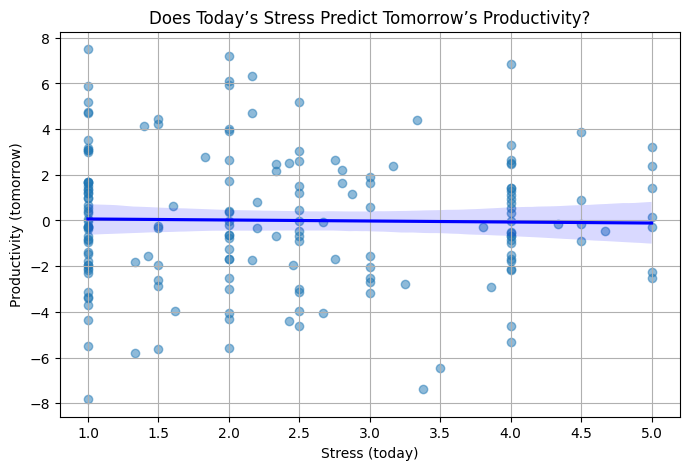

In [103]:
temp = prod_ema.sort_values("date").copy()
temp["Productivity_tomorrow"] = temp["ProductivityScore"].shift(-1)

plt.figure(figsize=(8,5))
sns.regplot(
    data=temp,
    x="Stress",
    y="Productivity_tomorrow",
    scatter_kws={"alpha":0.5},
    line_kws={"color":"blue"}
)
plt.title("Does Today’s Stress Predict Tomorrow’s Productivity?")
plt.xlabel("Stress (today)")
plt.ylabel("Productivity (tomorrow)")
plt.grid(True)
plt.show()


In [107]:
# ======================
# DATA PREPARATION OVERVIEW
# ======================
from pathlib import Path
import pandas as pd
import json

DATA_ROOT = Path("/kaggle/input/student-life/dataset")

print("=== DIRECTORY STRUCTURE ===")
for p in DATA_ROOT.iterdir():
    print("-", p.name)

# ------------------------------
# Count files across categories
# ------------------------------
def count_files(root):
    return sum(1 for _ in root.rglob("*") if _.is_file())

print("\nTotal files in dataset:", count_files(DATA_ROOT))

print("\n=== EMA FILE COUNT ===")
ema_path = DATA_ROOT / "EMA" / "response"
ema_files = list(ema_path.rglob("*.json"))
print("EMA JSON files:", len(ema_files))

# ------------------------------
# Sample load: Activity, WiFi, Phonelock
# ------------------------------
activity_sample = pd.read_csv(next((DATA_ROOT/"sensing/activity").glob("*.csv")), header=None)
wifi_sample = pd.read_csv(next((DATA_ROOT/"sensing/wifi").glob("*.csv")), header=None)
phonelock_sample = pd.read_csv(next((DATA_ROOT/"sensing/phonelock").glob("*.csv")), header=None)

print("\n=== SAMPLE: Activity ===")
print(activity_sample.head())

print("\n=== SAMPLE: WiFi ===")
print(wifi_sample.head())

print("\n=== SAMPLE: PhoneLock ===")
print(phonelock_sample.head())

# ------------------------------
# Show merged dataset shape
# (Assuming daily_merged exists from earlier steps)
# ------------------------------
try:
    print("\n=== FINAL MERGED DATA ===")
    print("daily_merged shape:", daily_merged.shape)
    print(daily_merged.head())
except NameError:
    print("\nMerged dataset not yet created in this notebook.")


=== DIRECTORY STRUCTURE ===
- EMA
- app_usage
- sensing
- calendar
- call_log
- education
- survey
- dinning
- sms

Total files in dataset: 1984

=== EMA FILE COUNT ===
EMA JSON files: 1274

=== SAMPLE: Activity ===
            0                    1
0   timestamp   activity inference
1  1364356942                    0
2  1364356945                    0
3  1364356948                    0
4  1364356950                    0

=== SAMPLE: WiFi ===
            0                  1     2      3
0        time              BSSID  freq  level
1  1364356834  dc:7b:94:87:1b:42  2412    -80
2  1364356834  dc:7b:94:87:1f:c3  2412    -86
3  1364356834  dc:7b:94:87:27:5f  5805    -64
4  1364356834  dc:7b:94:87:4d:f1  2462    -84

=== SAMPLE: PhoneLock ===
            0           1
0       start         end
1  1364357526  1364386856
2  1364396763  1364404425
3  1364410433  1364423434
4  1364500412  1364515280

=== FINAL MERGED DATA ===
daily_merged shape: (1267, 15)
  user_id        date  n_lock_inter

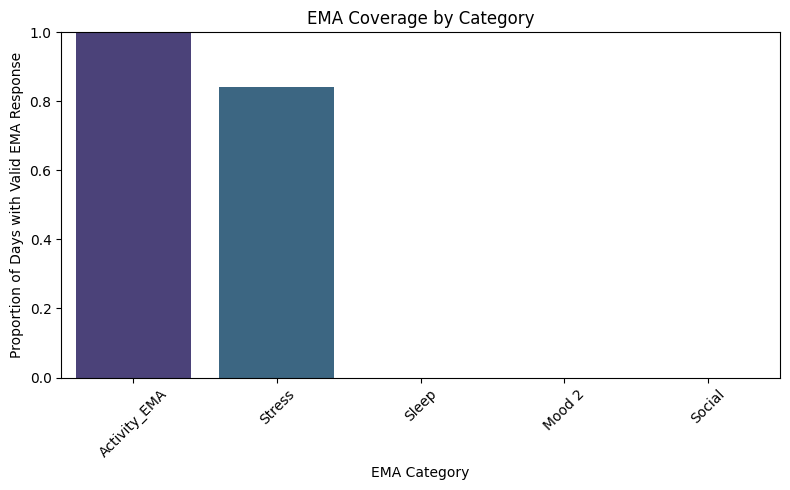

,EMA Category,Coverage
0,Activity_EMA,1.000000
1,Stress,0.841346
2,Sleep,0.000000
3,Mood 2,0.000000
4,Social,0.000000


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select EMA columns
ema_cols = ["Stress", "Sleep", "Mood 2", "Activity_EMA", "Social"]

# Compute coverage (% non-missing for each EMA variable)
coverage = prod_ema[ema_cols].notna().mean().sort_values(ascending=False)

# Create dataframe for plotting
coverage_df = coverage.reset_index()
coverage_df.columns = ["EMA Category", "Coverage"]

plt.figure(figsize=(8,5))
sns.barplot(
    data=coverage_df,
    x="EMA Category",
    y="Coverage",
    palette="viridis"
)

plt.title("EMA Coverage by Category")
plt.ylabel("Proportion of Days with Valid EMA Response")
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

coverage_df


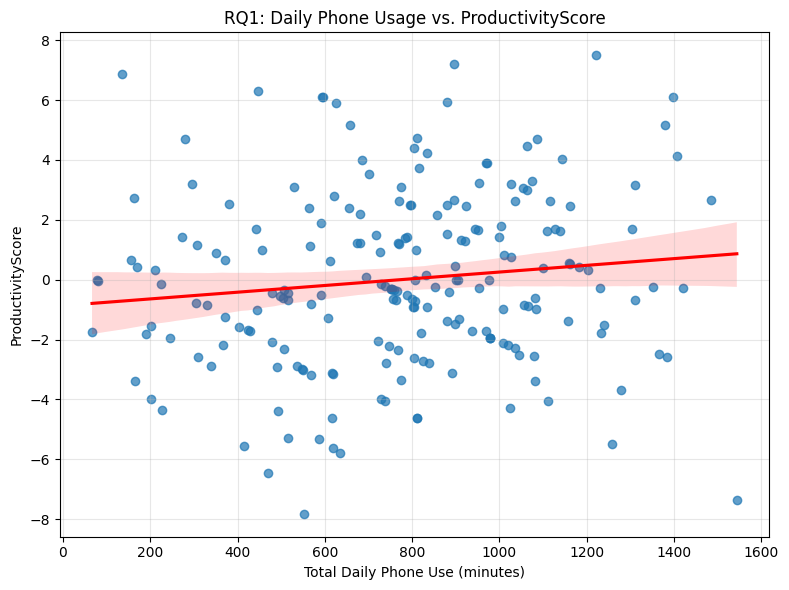

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure these columns exist in prod_df:
# "total_lock_duration_min" = total phone usage
# "ProductivityScore" = our derived productivity metric

plt.figure(figsize=(8,6))
sns.regplot(
    data=prod_df,
    x="total_lock_duration_min",
    y="ProductivityScore",
    scatter_kws={"alpha":0.7},
    line_kws={"color":"red"}
)

plt.title("RQ1: Daily Phone Usage vs. ProductivityScore")
plt.xlabel("Total Daily Phone Use (minutes)")
plt.ylabel("ProductivityScore")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


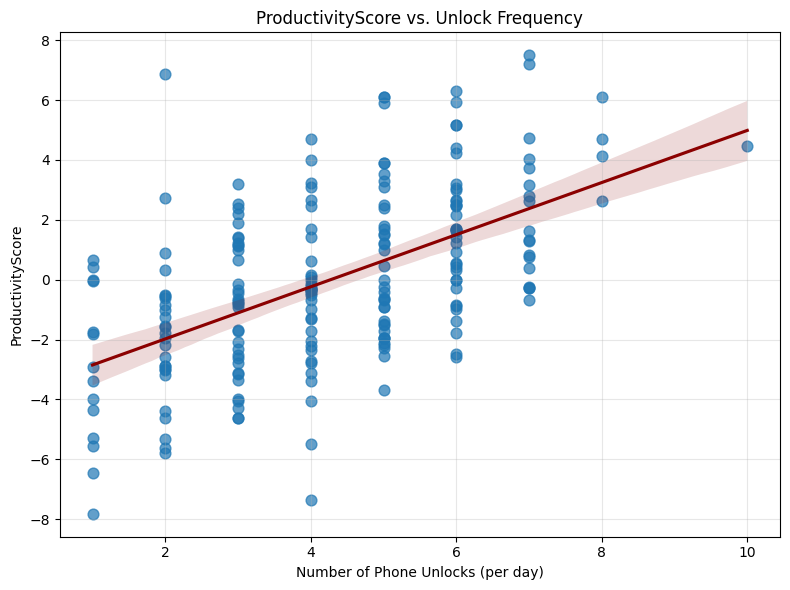

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.regplot(
    data=prod_df,
    x="n_lock_intervals",
    y="ProductivityScore",
    scatter_kws={"alpha": 0.7, "s": 60},
    line_kws={"color": "darkred"}
)

plt.title("ProductivityScore vs. Unlock Frequency")
plt.xlabel("Number of Phone Unlocks (per day)")
plt.ylabel("ProductivityScore")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


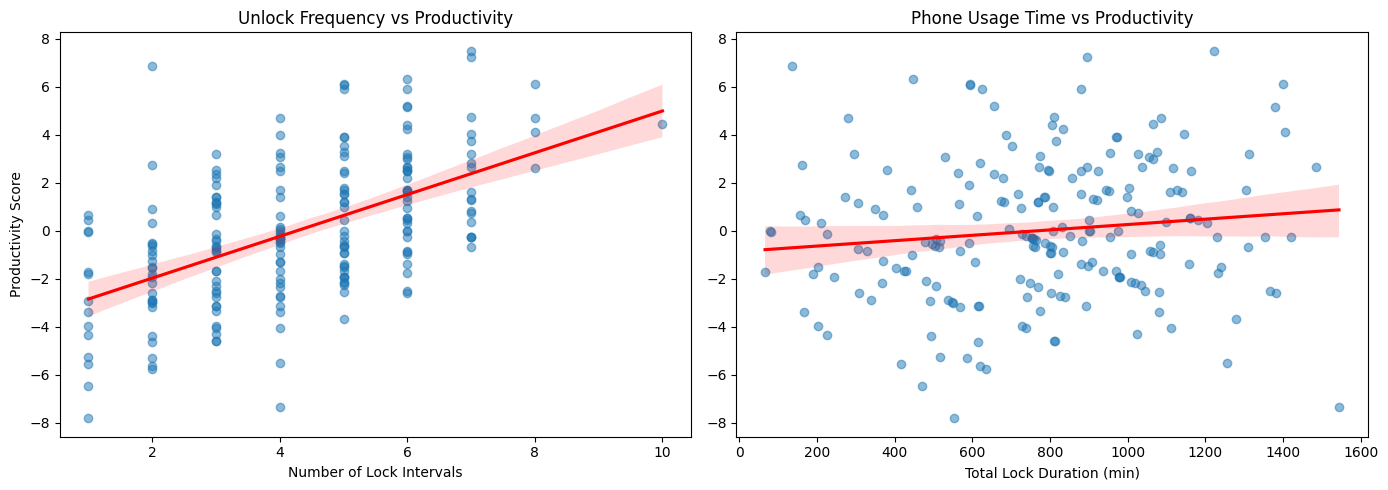

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.regplot(
    x=prod_df["n_lock_intervals"],
    y=prod_df["ProductivityScore"],
    scatter_kws={"alpha":0.5},
    line_kws={"color":"red"},
    ax=ax[0]
)
ax[0].set_title("Unlock Frequency vs Productivity")
ax[0].set_xlabel("Number of Lock Intervals")
ax[0].set_ylabel("Productivity Score")

sns.regplot(
    x=prod_df["total_lock_duration_min"],
    y=prod_df["ProductivityScore"],
    scatter_kws={"alpha":0.5},
    line_kws={"color":"red"},
    ax=ax[1]
)
ax[1].set_title("Phone Usage Time vs Productivity")
ax[1].set_xlabel("Total Lock Duration (min)")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()


In [114]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = prod_df["n_lock_intervals"].values.reshape(-1, 1)
y = prod_df["ProductivityScore"].values

n_boot = 2000
slopes = []

for _ in range(n_boot):
    idx = np.random.choice(len(X), len(X), replace=True)
    Xb, yb = X[idx], y[idx]
    model = LinearRegression().fit(Xb, yb)
    slopes.append(model.coef_[0])

lower = np.percentile(slopes, 2.5)
upper = np.percentile(slopes, 97.5)
median = np.median(slopes)

print("Bootstrap 95% CI for slope:", (lower, upper))
print("Median slope:", median)


Bootstrap 95% CI for slope: (0.697750799600577, 1.0451824300531247)
Median slope: 0.8741174058284966
